In [1]:
from os import path
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from lxml import etree
import spacy
from glob import glob

In [2]:
%matplotlib inline

In [3]:
nlp = spacy.load('fr_core_news_md')

In [4]:
StopWords = ["à", "à demi", "à peine", "à peu près", "absolument", "actuellement", "ainsi", "alors", "apparemment", "approximativement", "après", "après-demain", "assez", "assurément", "au", "aucun", "aucunement", "aucuns", "aujourd'hui", "auparavant", "aussi", "aussitôt", "autant", "autre", "autrefois", "autrement", "avant", "avant-hier", "avec", "avoir", "beaucoup", "bien", "bientôt", "bon", "c'", "ça", "car", "carrément", "ce", "cela", "celui", "cependant", "certainement", "certes", "ces", "ceux", "chaque", "ci", "comme", "comment", "complètement", "constamment", "contre", "d'", "d'abord", "dans", "davantage", "de", "début", "dedans", "dehors", "déjà", "demain", "depuis", "derechef", "des", "désormais", "deux", "devrait", "diablement", "divinement", "doit", "donc", "dont", "dorénavant", "dos", "droite", "drôlement", "du", "elle", "elles", "en", "en vérité", "encore", "enfin", "ensuite", "entièrement", "entre", "entre-temps", "environ", "essai", "essentiel", "essentiellement", "est", "et", "étaient", "état", "été", "étions", "être", "eu", "extrêmement", "fait", "faites", "femme", "fille", "fois", "font", "force", "grand", "grandement", "guère", "habituellement", "haut", "hier", "homme", "hors", "ici", "il", "ils", "immédiatement", "infiniment", "insuffisamment", "jadis", "jamais", "je", "joliment", "jusqu", "la", "là", "le", "les", "leur", "leurs",  "lequel", "lol", "longtemps", "lors", "lui", "ma", "maintenant", "mais", "man", "mdr", "même", "mec", "merde", "mes", "mme", "moins", "mon", "mot", "naguère",  "naturellement", "nécessaire", "ne", "ni", "nommés", "non", "notre", "nous", "nouveaux", "nullement", "ou", "où", "ouai", "ouais", "oui", "par", "parce", "parfois", "parole", "pas", "pas mal", "passablement", "pendant", "personne", "personnes", "petit", "peu", "peut", "peut-être", "pièce", "plupart", "plus", "plutôt", "point", "possible", "pour", "pourquoi", "précisément", "premier", "premièrement", "presque", "probablement", "prou", "puis", "quand", "quasi", "quasiment", "que", "quel", "quelle", "quelles", "quelque", "quelquefois", "quels", "qui", "quoi", "quotidiennement", "rien", "rudement", "s'", "sa", "sans", "sans doute", "ses", "seulement", "si", "sien", "simplement", "sitôt", "soit", "son", "sont", "soudain", "sous", "souvent", "soyez", "subitement", "suffisamment", "sur", "t'", "ta", "tandis", "tant", "tantôt", "tard", "tellement", "tellement", "tels", "terriblement", "tes", "ton", "tôt", "totalement", "toujours", "tous", "tout", "toutefois", "très", "trois", "trop", "tu", "un", "une", "valeur", "vers", "voie", "voient", "volontiers", "vont", "votre", "vous", "vraiment", "vraisemblablement"]

In [7]:
def est_canon(tree):
    if tree.find(".//profileDesc") is not None:
        profil = tree.find(".//profileDesc")
        if profil.get("tag") == "canon":
            return True
        else:
            return False

In [6]:
def word_freq(path):
    tag = 0
    nombre_token = 0
    words_freq = Counter()
    conteur = 0
    with open(path, encoding="utf8") as file:
        tree = etree.parse(file)
        tag = est_canon(tree)
        if tree.findall(".//p"):
            for paragraphe in tree.findall(".//p"):
                if paragraphe.text:
                    conteur+=len(paragraphe.text)
                    docs = nlp(paragraphe.text)
                    for token in docs:
                        if token.pos_ != "PUNCT" and "SPACE" and "X" and "SYM"
                            nombre_token += 1
                            if token.text not in StopWords:
                                words_freq[token.lemma_] += 1
    print("longueur du texte en nombre de lettres: ", conteur)
    print("Nombre de tokens dans le texte : ", nombre_token)
    print("Nombre de lemmes dans le texte : ", len(words_freq))
    print("Nombre de lemmes totaux dans le texte : ", sum(words_freq.values()))
    return words_freq, nombre_token, tag, conteur, sum(words_freq.values())

In [10]:
canon = False
corpus = dict() # dictionnaire des dictionnaires de chaque texte
type_token_canon = []
type_token_archive = []
for doc in glob('romans-master/*.xml'):
    doc_name = path.splitext(path.basename(doc))[0]
    print(doc_name)
    corpus[doc_name], token, canon, lemmes, lemmes_totaux = word_freq(doc)
    moyenne_lemme = lemmes/token
    if canon:
        type_token_canon.append(moyenne_lemme)
    else:
        type_token_archive.append(moyenne_lemme)

1811_Chateaubriand-François-Rene-de_Oeuvres-completes-de-Chateaubriand-augmentees-d-un-essai-sur-la-vie-et-les-ouvrages-de-l-auteur-[par-Delandine-de-Saint-Esprit]-Volume-7-(1851-1852)
Nombre de mots dans le texte :  924738
Nombre de tokens dans le texte :  165020
Nombre de lemmes dans le texte :  11315
Nombre de lemmes totaux dans le texte :  96026
1812_Kock-Paul-de_L-enfant-de-ma-femme
Nombre de mots dans le texte :  300617
Nombre de tokens dans le texte :  54497
Nombre de lemmes dans le texte :  3902
Nombre de lemmes totaux dans le texte :  28871
1815_Gay-Sophie_Anatole-Vol-1
Nombre de mots dans le texte :  167355
Nombre de tokens dans le texte :  30252
Nombre de lemmes dans le texte :  2912
Nombre de lemmes totaux dans le texte :  15965
1815_Gay-Sophie_Anatole-Vol-2
Nombre de mots dans le texte :  174075
Nombre de tokens dans le texte :  31698
Nombre de lemmes dans le texte :  2779
Nombre de lemmes totaux dans le texte :  16794
1816_Barthelemy-Hadot-Marie-Adelaide_La-Vierge-de-l-In

Nombre de mots dans le texte :  490320
Nombre de tokens dans le texte :  87796
Nombre de lemmes dans le texte :  6653
Nombre de lemmes totaux dans le texte :  50368
1827_Vidocq-Eugene-François_Memoires-de-Vidocq-Tome-II
Nombre de mots dans le texte :  526144
Nombre de tokens dans le texte :  95604
Nombre de lemmes dans le texte :  7167
Nombre de lemmes totaux dans le texte :  53733
1827_Vidocq-Eugene-François_Memoires-de-Vidocq-Tome-III
Nombre de mots dans le texte :  476136
Nombre de tokens dans le texte :  87176
Nombre de lemmes dans le texte :  7161
Nombre de lemmes totaux dans le texte :  48910
1827_Vidocq-Eugene-François_Memoires-de-Vidocq-Tome-IV
Nombre de mots dans le texte :  435365
Nombre de tokens dans le texte :  78798
Nombre de lemmes dans le texte :  7159
Nombre de lemmes totaux dans le texte :  44367
1827_Vigny-Alfred-de_Cinq-Mars
Nombre de mots dans le texte :  753088
Nombre de tokens dans le texte :  138385
Nombre de lemmes dans le texte :  7348
Nombre de lemmes totaux 

Nombre de mots dans le texte :  286455
Nombre de tokens dans le texte :  52162
Nombre de lemmes dans le texte :  5033
Nombre de lemmes totaux dans le texte :  28164
1833_Dumas-Alexandre_Impressions-de-voyage-en-Suisse
Nombre de mots dans le texte :  1624947
Nombre de tokens dans le texte :  297469
Nombre de lemmes dans le texte :  12413
Nombre de lemmes totaux dans le texte :  167574
1833_Girardin-Delphine-de_Contes-d-une-vieille-fille-a-ses-neveux
Nombre de mots dans le texte :  268643
Nombre de tokens dans le texte :  48307
Nombre de lemmes dans le texte :  3825
Nombre de lemmes totaux dans le texte :  27386
1833_Karr-Alphonse_Une-heure-trop-tard
Nombre de mots dans le texte :  469713
Nombre de tokens dans le texte :  85960
Nombre de lemmes dans le texte :  5539
Nombre de lemmes totaux dans le texte :  47520
1833_Musset-Alfred-de_Gamiani-ou-Deux-Nuits-d-Exces
Nombre de mots dans le texte :  89189
Nombre de tokens dans le texte :  15494
Nombre de lemmes dans le texte :  2462
Nombre de

Nombre de mots dans le texte :  256724
Nombre de tokens dans le texte :  46002
Nombre de lemmes dans le texte :  4513
Nombre de lemmes totaux dans le texte :  25767
1837_Sand-George_Mauprat
Nombre de mots dans le texte :  664652
Nombre de tokens dans le texte :  122782
Nombre de lemmes dans le texte :  6701
Nombre de lemmes totaux dans le texte :  68074
1838_Corbiere-Edouard_Les-Trois-Pirates
Nombre de mots dans le texte :  222829
Nombre de tokens dans le texte :  41010
Nombre de lemmes dans le texte :  4596
Nombre de lemmes totaux dans le texte :  21964
1838_Dumas-Alexandre_Le-Capitaine-Paul
Nombre de mots dans le texte :  358576
Nombre de tokens dans le texte :  65490
Nombre de lemmes dans le texte :  4684
Nombre de lemmes totaux dans le texte :  36893
1838_Dumas-Alexandre_Othon-l-Archer
Nombre de mots dans le texte :  185055
Nombre de tokens dans le texte :  33838
Nombre de lemmes dans le texte :  2944
Nombre de lemmes totaux dans le texte :  19067
1838_Dupin-Antoinette_Comment-tout

Nombre de mots dans le texte :  128756
Nombre de tokens dans le texte :  22609
Nombre de lemmes dans le texte :  3132
Nombre de lemmes totaux dans le texte :  12713
1842_Balzac-Honore-de_Le-Contrat-de-mariageFC
Nombre de mots dans le texte :  283010
Nombre de tokens dans le texte :  50307
Nombre de lemmes dans le texte :  4603
Nombre de lemmes totaux dans le texte :  28553
1842_Balzac-Honore-de_Madame-Firmiani
Nombre de mots dans le texte :  44914
Nombre de tokens dans le texte :  8075
Nombre de lemmes dans le texte :  1579
Nombre de lemmes totaux dans le texte :  4511
1842_Balzac-Honore-de_Memoires-de-deux-jeunes-mariees
Nombre de mots dans le texte :  441354
Nombre de tokens dans le texte :  82900
Nombre de lemmes dans le texte :  5669
Nombre de lemmes totaux dans le texte :  46161
1842_Balzac-Honore-de_Une-double-familleFC
Nombre de mots dans le texte :  154066
Nombre de tokens dans le texte :  27437
Nombre de lemmes dans le texte :  3583
Nombre de lemmes totaux dans le texte :  154

Nombre de mots dans le texte :  208774
Nombre de tokens dans le texte :  37622
Nombre de lemmes dans le texte :  3317
Nombre de lemmes totaux dans le texte :  21555
1843_Pigault-Lebrun_Mon-oncle-Thomas
Nombre de mots dans le texte :  721840
Nombre de tokens dans le texte :  129503
Nombre de lemmes dans le texte :  8127
Nombre de lemmes totaux dans le texte :  73456
1843_Sand-George_Consuelo
Nombre de mots dans le texte :  1979328
Nombre de tokens dans le texte :  360363
Nombre de lemmes dans le texte :  11098
Nombre de lemmes totaux dans le texte :  198924
1843_Sand-George_La-Comtesse-de-Rudolstadt
Nombre de mots dans le texte :  1205119
Nombre de tokens dans le texte :  218841
Nombre de lemmes dans le texte :  9126
Nombre de lemmes totaux dans le texte :  120933
1843_Sue-Eugene_Les-Mysteres-de-Paris-Tome-I
Nombre de mots dans le texte :  684135
Nombre de tokens dans le texte :  124482
Nombre de lemmes dans le texte :  7519
Nombre de lemmes totaux dans le texte :  73322
1843_Sue-Eugene

Nombre de mots dans le texte :  52197
Nombre de tokens dans le texte :  9170
Nombre de lemmes dans le texte :  2003
Nombre de lemmes totaux dans le texte :  5470
1845_Balzac-Honore-de_L-Enfant-maudit
Nombre de mots dans le texte :  216442
Nombre de tokens dans le texte :  38206
Nombre de lemmes dans le texte :  4108
Nombre de lemmes totaux dans le texte :  21732
1845_Balzac-Honore-de_La-Recherche-de-l-Absolu
Nombre de mots dans le texte :  412329
Nombre de tokens dans le texte :  72173
Nombre de lemmes dans le texte :  5639
Nombre de lemmes totaux dans le texte :  40668
1845_Balzac-Honore-de_Le-Chef-d-oeuvre-inconnu
Nombre de mots dans le texte :  56511
Nombre de tokens dans le texte :  10262
Nombre de lemmes dans le texte :  1832
Nombre de lemmes totaux dans le texte :  5852
1845_Balzac-Honore-de_Le-RequisitionnaireFC
Nombre de mots dans le texte :  33890
Nombre de tokens dans le texte :  5910
Nombre de lemmes dans le texte :  1327
Nombre de lemmes totaux dans le texte :  3394
1845_Ba

Nombre de mots dans le texte :  39889
Nombre de tokens dans le texte :  7063
Nombre de lemmes dans le texte :  1536
Nombre de lemmes totaux dans le texte :  4134
1846_Balzac-Honore-de_Gaudissart-II
Nombre de mots dans le texte :  20909
Nombre de tokens dans le texte :  3711
Nombre de lemmes dans le texte :  1032
Nombre de lemmes totaux dans le texte :  2133
1846_Balzac-Honore-de_Gobseck
Nombre de mots dans le texte :  122609
Nombre de tokens dans le texte :  22007
Nombre de lemmes dans le texte :  3069
Nombre de lemmes totaux dans le texte :  12712
1846_Balzac-Honore-de_La-Femme-abandonneeFC
Nombre de mots dans le texte :  92959
Nombre de tokens dans le texte :  16458
Nombre de lemmes dans le texte :  2415
Nombre de lemmes totaux dans le texte :  9071
1846_Balzac-Honore-de_La-Grenadiere
Nombre de mots dans le texte :  52166
Nombre de tokens dans le texte :  9136
Nombre de lemmes dans le texte :  1823
Nombre de lemmes totaux dans le texte :  5145
1846_Balzac-Honore-de_Le-Cure-de-village

Nombre de mots dans le texte :  1394120
Nombre de tokens dans le texte :  252878
Nombre de lemmes dans le texte :  9575
Nombre de lemmes totaux dans le texte :  146589
1847_Inconnu_La-bonne-mere
Nombre de mots dans le texte :  178966
Nombre de tokens dans le texte :  31887
Nombre de lemmes dans le texte :  3266
Nombre de lemmes totaux dans le texte :  18254
1847_Richomme-Fanny-Claudet-Mme-Prosper_Grain-de-sable-ou-le-Sorcier-d-Altenbourg
Nombre de mots dans le texte :  113696
Nombre de tokens dans le texte :  20501
Nombre de lemmes dans le texte :  2633
Nombre de lemmes totaux dans le texte :  11632
1847_Sainte-Marie-Mme-de-Plagniol_Les-Bonnes-eleves
Nombre de mots dans le texte :  360161
Nombre de tokens dans le texte :  67539
Nombre de lemmes dans le texte :  3966
Nombre de lemmes totaux dans le texte :  36042
1847_Sand-George_Le-peche-de-M-Antoine
Nombre de mots dans le texte :  851522
Nombre de tokens dans le texte :  157858
Nombre de lemmes dans le texte :  7160
Nombre de lemmes t

Nombre de mots dans le texte :  451341
Nombre de tokens dans le texte :  82248
Nombre de lemmes dans le texte :  5867
Nombre de lemmes totaux dans le texte :  50354
1850_Feval-Paul-(pere)_Les-Belles-de-nuit-ou-Les-Anges-de-la-famille-Tome-I
Nombre de mots dans le texte :  740068
Nombre de tokens dans le texte :  133639
Nombre de lemmes dans le texte :  6665
Nombre de lemmes totaux dans le texte :  79949
1850_Feval-Paul-(pere)_Les-Belles-de-nuit-ou-Les-Anges-de-la-famille-Tome-II
Nombre de mots dans le texte :  636110
Nombre de tokens dans le texte :  113978
Nombre de lemmes dans le texte :  6361
Nombre de lemmes totaux dans le texte :  68800
1850_Inconnu_Un-roman-sous-l-Empire
Nombre de mots dans le texte :  447149
Nombre de tokens dans le texte :  81697
Nombre de lemmes dans le texte :  5809
Nombre de lemmes totaux dans le texte :  45560
1850_Lamartine-Alphonse-de_Genevieve--histoire-d-une-servante
Nombre de mots dans le texte :  467213
Nombre de tokens dans le texte :  87875
Nombre d

Nombre de mots dans le texte :  128150
Nombre de tokens dans le texte :  22820
Nombre de lemmes dans le texte :  2494
Nombre de lemmes totaux dans le texte :  13132
1854_Barbey-d-Aurevilly-Jules_L-ensorcelee
Nombre de mots dans le texte :  431545
Nombre de tokens dans le texte :  79542
Nombre de lemmes dans le texte :  6306
Nombre de lemmes totaux dans le texte :  44330
1854_Barthelemy-(de-Paris)-Charles_Histoire-de-la-Bretagne-ancienne-et-moderne
Nombre de mots dans le texte :  758674
Nombre de tokens dans le texte :  133193
Nombre de lemmes dans le texte :  8165
Nombre de lemmes totaux dans le texte :  76916
1854_Bassanville-Anais-de_Les-Primeurs-de-la-vie-ou-Bonheurs-joies-et-douleurs-de-la-jeunesse
Nombre de mots dans le texte :  196959
Nombre de tokens dans le texte :  35106
Nombre de lemmes dans le texte :  3544
Nombre de lemmes totaux dans le texte :  19531
1854_Collin-de-Plancy-Jacques-Albin-Simon_Les-Tribulations-de-Robillard-ou-les-Honnetes-gens-comme-il-y-en-a-trop
Nombre de

Nombre de mots dans le texte :  373854
Nombre de tokens dans le texte :  67781
Nombre de lemmes dans le texte :  5446
Nombre de lemmes totaux dans le texte :  41427
1856_Feval-Paul-(pere)_Madame-Gil-Blas-souvenirs-et-aventures-d-une-femme-de-notre-temps-(Volume 6)
Nombre de mots dans le texte :  55082
Nombre de tokens dans le texte :  10124
Nombre de lemmes dans le texte :  1769
Nombre de lemmes totaux dans le texte :  6125
1856_Feval-Paul-(pere)_Madame-Gil-Blas-souvenirs-et-aventures-d-une-femme-de-notre-temps-(Volume-1)
Nombre de mots dans le texte :  237734
Nombre de tokens dans le texte :  42852
Nombre de lemmes dans le texte :  4377
Nombre de lemmes totaux dans le texte :  25522
1856_Feval-Paul-(pere)_Madame-Gil-Blas-souvenirs-et-aventures-d-une-femme-de-notre-temps-(Volume-2)
Nombre de mots dans le texte :  106920
Nombre de tokens dans le texte :  18844
Nombre de lemmes dans le texte :  2925
Nombre de lemmes totaux dans le texte :  11660
1856_Feval-Paul-(pere)_Madame-Gil-Blas-sou

Nombre de mots dans le texte :  204117
Nombre de tokens dans le texte :  36176
Nombre de lemmes dans le texte :  4352
Nombre de lemmes totaux dans le texte :  21087
1858_Gautier-Theophile_Le-roman-de-la-momie
Nombre de mots dans le texte :  346044
Nombre de tokens dans le texte :  59750
Nombre de lemmes dans le texte :  5830
Nombre de lemmes totaux dans le texte :  35344
1858_Gouraud-Julie_Les-Vacances-d-Yvonne
Nombre de mots dans le texte :  239432
Nombre de tokens dans le texte :  42196
Nombre de lemmes dans le texte :  3897
Nombre de lemmes totaux dans le texte :  24818
1858_Ponson-du-Terrail-Pierre_Le-Club-des-valets-de-coeurs
Nombre de mots dans le texte :  1622853
Nombre de tokens dans le texte :  296509
Nombre de lemmes dans le texte :  8817
Nombre de lemmes totaux dans le texte :  180441
1858_Pressense-Elise-de_Rosa-par-Mme-E-de-Pressense-(1858)
Nombre de mots dans le texte :  438794
Nombre de tokens dans le texte :  81432
Nombre de lemmes dans le texte :  4629
Nombre de lemmes

Nombre de mots dans le texte :  399617
Nombre de tokens dans le texte :  69451
Nombre de lemmes dans le texte :  6154
Nombre de lemmes totaux dans le texte :  42212
1860_Feval-Paul-(pere)_Le-Chevalier-Tenebre
Nombre de mots dans le texte :  220400
Nombre de tokens dans le texte :  39569
Nombre de lemmes dans le texte :  4452
Nombre de lemmes totaux dans le texte :  23508
1860_Feval-Paul-(pere)_Le-Medecin-bleu
Nombre de mots dans le texte :  78054
Nombre de tokens dans le texte :  14120
Nombre de lemmes dans le texte :  2204
Nombre de lemmes totaux dans le texte :  8489
1860_Goncourt-Edmond-de-Goncourt-Jules-de_Charles-Demailly
Nombre de mots dans le texte :  660921
Nombre de tokens dans le texte :  117094
Nombre de lemmes dans le texte :  9864
Nombre de lemmes totaux dans le texte :  62496
1860_Noriac-Jules_La-betise-humaine
Nombre de mots dans le texte :  235469
Nombre de tokens dans le texte :  43052
Nombre de lemmes dans le texte :  4114
Nombre de lemmes totaux dans le texte :  2397

Nombre de mots dans le texte :  256599
Nombre de tokens dans le texte :  46555
Nombre de lemmes dans le texte :  4829
Nombre de lemmes totaux dans le texte :  26152
1862_Erckmann-Chatrian_Confidences-d-un-joueur-de-clarinette
Nombre de mots dans le texte :  163731
Nombre de tokens dans le texte :  30300
Nombre de lemmes dans le texte :  2372
Nombre de lemmes totaux dans le texte :  17339
1862_Erckmann-Chatrian_Contes-des-bords-du-Rhin
Nombre de mots dans le texte :  306042
Nombre de tokens dans le texte :  53648
Nombre de lemmes dans le texte :  5431
Nombre de lemmes totaux dans le texte :  32175
1862_Erckmann-Chatrian_L-Invasion-ou-le-Fou-Yegof
Nombre de mots dans le texte :  403770
Nombre de tokens dans le texte :  71247
Nombre de lemmes dans le texte :  4797
Nombre de lemmes totaux dans le texte :  41747
1862_Fabre-Ferdinand_Les-Courbezon
Nombre de mots dans le texte :  782241
Nombre de tokens dans le texte :  138307
Nombre de lemmes dans le texte :  8053
Nombre de lemmes totaux dan

Nombre de mots dans le texte :  788404
Nombre de tokens dans le texte :  144956
Nombre de lemmes dans le texte :  7991
Nombre de lemmes totaux dans le texte :  79676
1864_Bastide-Jenny_Le-monstre
Nombre de mots dans le texte :  199520
Nombre de tokens dans le texte :  35819
Nombre de lemmes dans le texte :  3071
Nombre de lemmes totaux dans le texte :  20088
1864_Boissieres-Ernest_Un-crime-inconnu
Nombre de mots dans le texte :  182351
Nombre de tokens dans le texte :  32518
Nombre de lemmes dans le texte :  3643
Nombre de lemmes totaux dans le texte :  18863
1864_Capendu-Ernest_Le-Marquis-de-Loc-Ronan
Nombre de mots dans le texte :  555860
Nombre de tokens dans le texte :  99265
Nombre de lemmes dans le texte :  6334
Nombre de lemmes totaux dans le texte :  60283
1864_Chevalier-H-Emile_Peaux-rouges-et-Peaux-blanches
Nombre de mots dans le texte :  329083
Nombre de tokens dans le texte :  58587
Nombre de lemmes dans le texte :  6263
Nombre de lemmes totaux dans le texte :  33695
1864_D

Nombre de mots dans le texte :  333568
Nombre de tokens dans le texte :  56942
Nombre de lemmes dans le texte :  5746
Nombre de lemmes totaux dans le texte :  34307
1865_ Verne-Jules_Les-Forceurs-de-blocus
Nombre de mots dans le texte :  110560
Nombre de tokens dans le texte :  19475
Nombre de lemmes dans le texte :  2440
Nombre de lemmes totaux dans le texte :  11557
1866_Chevalier-H-Emile_La-fille-des-indiens-rouges
Nombre de mots dans le texte :  383046
Nombre de tokens dans le texte :  67320
Nombre de lemmes dans le texte :  6771
Nombre de lemmes totaux dans le texte :  38632
1866_Erckmann-Chatrian_Le-Blocus
Nombre de mots dans le texte :  379434
Nombre de tokens dans le texte :  68757
Nombre de lemmes dans le texte :  4181
Nombre de lemmes totaux dans le texte :  39424
1866_Feuillet-Octave_Monsieur-de-Camors
Nombre de mots dans le texte :  521906
Nombre de tokens dans le texte :  93519
Nombre de lemmes dans le texte :  6117
Nombre de lemmes totaux dans le texte :  52647
1866_Gabor

Nombre de mots dans le texte :  216000
Nombre de tokens dans le texte :  39013
Nombre de lemmes dans le texte :  3694
Nombre de lemmes totaux dans le texte :  20809
1867_Pitray-Olga-de-Segur_Les-enfants-des-Tuileries
Nombre de mots dans le texte :  255159
Nombre de tokens dans le texte :  44109
Nombre de lemmes dans le texte :  3731
Nombre de lemmes totaux dans le texte :  26039
1867_Ponson-du-Terrail-Pierre-Alexis-de_L-heritage-de-Corinne-La-Mule-de-satin
Nombre de mots dans le texte :  315115
Nombre de tokens dans le texte :  56723
Nombre de lemmes dans le texte :  4405
Nombre de lemmes totaux dans le texte :  33820
1867_Ponson-du-Terrail-Pierre-Alexis-de_Memoires-d-un-gendarme
Nombre de mots dans le texte :  468337
Nombre de tokens dans le texte :  84976
Nombre de lemmes dans le texte :  5255
Nombre de lemmes totaux dans le texte :  50053
1867_Ponson-du-Terrail-Pierre_La-Verite-sur-Rocambole
Nombre de mots dans le texte :  155855
Nombre de tokens dans le texte :  29101
Nombre de lem

Nombre de mots dans le texte :  410857
Nombre de tokens dans le texte :  71912
Nombre de lemmes dans le texte :  4390
Nombre de lemmes totaux dans le texte :  42386
1869_Biart-Lucien_Pile-et-face
Nombre de mots dans le texte :  429862
Nombre de tokens dans le texte :  76469
Nombre de lemmes dans le texte :  5978
Nombre de lemmes totaux dans le texte :  43874
1869_Blandy-Stella_Revanche-de-femme
Nombre de mots dans le texte :  322879
Nombre de tokens dans le texte :  58020
Nombre de lemmes dans le texte :  5418
Nombre de lemmes totaux dans le texte :  32776
1869_Carraud-Zulma-Tourangin-Mme_Les-Gouters-de-la-grand-mere
Nombre de mots dans le texte :  370500
Nombre de tokens dans le texte :  65724
Nombre de lemmes dans le texte :  5342
Nombre de lemmes totaux dans le texte :  37235
1869_Erckmann-Chatrian_Histoire-d-un-paysan-I
Nombre de mots dans le texte :  444937
Nombre de tokens dans le texte :  79605
Nombre de lemmes dans le texte :  4897
Nombre de lemmes totaux dans le texte :  44337

Nombre de mots dans le texte :  332323
Nombre de tokens dans le texte :  61881
Nombre de lemmes dans le texte :  3701
Nombre de lemmes totaux dans le texte :  39803
1870_Verne-Jules_Vingt-mille-lieues-sous-les-mers
Nombre de mots dans le texte :  863436
Nombre de tokens dans le texte :  149148
Nombre de lemmes dans le texte :  9328
Nombre de lemmes totaux dans le texte :  90434
1870_Zola-Emile_La-fortune-des-Rougon
Nombre de mots dans le texte :  713224
Nombre de tokens dans le texte :  125067
Nombre de lemmes dans le texte :  6772
Nombre de lemmes totaux dans le texte :  74489
1871_Achard-Amedee_Recits-d-un-soldat
Nombre de mots dans le texte :  256660
Nombre de tokens dans le texte :  45891
Nombre de lemmes dans le texte :  4275
Nombre de lemmes totaux dans le texte :  27612
1871_Daudet-Alphonse_Tartarin-de-Tarascon
Nombre de mots dans le texte :  164280
Nombre de tokens dans le texte :  28836
Nombre de lemmes dans le texte :  3894
Nombre de lemmes totaux dans le texte :  17138
1871_

Nombre de mots dans le texte :  695822
Nombre de tokens dans le texte :  127595
Nombre de lemmes dans le texte :  6393
Nombre de lemmes totaux dans le texte :  68025
1873_Marmette-Joseph_Chevalier-de-Mornac--Chronique-de-la-Nouvelle-France-(1664)
Nombre de mots dans le texte :  501604
Nombre de tokens dans le texte :  89968
Nombre de lemmes dans le texte :  6597
Nombre de lemmes totaux dans le texte :  50559
1873_Pressense-Elise-de_Un-petit-monde-d-enfants
Nombre de mots dans le texte :  267830
Nombre de tokens dans le texte :  49204
Nombre de lemmes dans le texte :  3116
Nombre de lemmes totaux dans le texte :  27706
1873_Rousset-Alexis_Derailles-et-declasses-Paris-et-la-province-Tome-1
Nombre de mots dans le texte :  402942
Nombre de tokens dans le texte :  72622
Nombre de lemmes dans le texte :  5215
Nombre de lemmes totaux dans le texte :  42159
1873_Rousset-Alexis_Derailles-et-declasses-Paris-et-la-province-Tome-2
Nombre de mots dans le texte :  471358
Nombre de tokens dans le tex

Nombre de mots dans le texte :  399426
Nombre de tokens dans le texte :  71169
Nombre de lemmes dans le texte :  5817
Nombre de lemmes totaux dans le texte :  39389
1875_Mirabeau-Marie-Le-Harivel-de-Gonneville_Ctesse-de-Mirabeau-Jane-et-Germaine-Voyages-d-un-capitaine
Nombre de mots dans le texte :  319778
Nombre de tokens dans le texte :  58394
Nombre de lemmes dans le texte :  4714
Nombre de lemmes totaux dans le texte :  33213
1875_Noel-Eugene_Memoires-d-un-imbecile--ecrits-par-lui-meme
Nombre de mots dans le texte :  251973
Nombre de tokens dans le texte :  44471
Nombre de lemmes dans le texte :  4308
Nombre de lemmes totaux dans le texte :  25113
1875_Sand-George_Marianne
Nombre de mots dans le texte :  131546
Nombre de tokens dans le texte :  24612
Nombre de lemmes dans le texte :  2870
Nombre de lemmes totaux dans le texte :  13724
1875_Stolz-Madame-de_Valentine
Nombre de mots dans le texte :  405312
Nombre de tokens dans le texte :  73133
Nombre de lemmes dans le texte :  5156


Nombre de mots dans le texte :  159827
Nombre de tokens dans le texte :  29990
Nombre de lemmes dans le texte :  3163
Nombre de lemmes totaux dans le texte :  16423
1876_Gouraud-Julie_Les-Filles-du-professeur
Nombre de mots dans le texte :  258501
Nombre de tokens dans le texte :  45386
Nombre de lemmes dans le texte :  3622
Nombre de lemmes totaux dans le texte :  26791
1876_Gouraud-Julie_Les-Quatre-pièces-d'or
Nombre de mots dans le texte :  253028
Nombre de tokens dans le texte :  45104
Nombre de lemmes dans le texte :  3723
Nombre de lemmes totaux dans le texte :  26518
1876_Greville-Henry_Dosia
Nombre de mots dans le texte :  241329
Nombre de tokens dans le texte :  43309
Nombre de lemmes dans le texte :  4339
Nombre de lemmes totaux dans le texte :  25770
1876_Greville-Henry_L-expiation-de-Saveli
Nombre de mots dans le texte :  236873
Nombre de tokens dans le texte :  42380
Nombre de lemmes dans le texte :  3785
Nombre de lemmes totaux dans le texte :  25036
1876_Greville-Henry_L

Nombre de mots dans le texte :  238389
Nombre de tokens dans le texte :  42501
Nombre de lemmes dans le texte :  4628
Nombre de lemmes totaux dans le texte :  24130
1877_Daudet-Ernest_Le-Crime-de-Jean-Malory
Nombre de mots dans le texte :  521200
Nombre de tokens dans le texte :  95476
Nombre de lemmes dans le texte :  5291
Nombre de lemmes totaux dans le texte :  56849
1877_Daudet-Ernest_Les-Persecutees-Severine-Realti-la-baronne-Miroel
Nombre de mots dans le texte :  352215
Nombre de tokens dans le texte :  64395
Nombre de lemmes dans le texte :  4276
Nombre de lemmes totaux dans le texte :  37384
1877_Debans-Camille_Le-Capitaine-Marche-ou-Creve
Nombre de mots dans le texte :  734977
Nombre de tokens dans le texte :  134651
Nombre de lemmes dans le texte :  7537
Nombre de lemmes totaux dans le texte :  81209
1877_Deslys-Charles_Le-blesse-de-Gravelotte
Nombre de mots dans le texte :  97198
Nombre de tokens dans le texte :  17065
Nombre de lemmes dans le texte :  2438
Nombre de lemmes 

Nombre de mots dans le texte :  1093857
Nombre de tokens dans le texte :  201021
Nombre de lemmes dans le texte :  7593
Nombre de lemmes totaux dans le texte :  117580
1878_Calonne-Alphonse-de_La-Ferme-des-moines
Nombre de mots dans le texte :  497708
Nombre de tokens dans le texte :  91385
Nombre de lemmes dans le texte :  6975
Nombre de lemmes totaux dans le texte :  52505
1878_Chavannes-de-La-Giraudiere-Hippolyte-de_Patrice-ou-Les-pionniers-de-l-Amerique-du-Nord
Nombre de mots dans le texte :  39145
Nombre de tokens dans le texte :  7046
Nombre de lemmes dans le texte :  1349
Nombre de lemmes totaux dans le texte :  3831
1878_Chavette-Eugene_Aime-de-son-concierge
Nombre de mots dans le texte :  512745
Nombre de tokens dans le texte :  95935
Nombre de lemmes dans le texte :  6900
Nombre de lemmes totaux dans le texte :  56864
1878_Chavette-Eugene_La-Recherche-d-un-pourquoi
Nombre de mots dans le texte :  571883
Nombre de tokens dans le texte :  105877
Nombre de lemmes dans le texte :

Nombre de mots dans le texte :  285070
Nombre de tokens dans le texte :  51694
Nombre de lemmes dans le texte :  4105
Nombre de lemmes totaux dans le texte :  29988
1879_Berthet-Elie_Les-Cagnards-de-l-Hotel-Dieu-de-Paris
Nombre de mots dans le texte :  622047
Nombre de tokens dans le texte :  110853
Nombre de lemmes dans le texte :  6490
Nombre de lemmes totaux dans le texte :  65992
1879_Bouvier-Alexis_La-Belle-Grelee
Nombre de mots dans le texte :  1111375
Nombre de tokens dans le texte :  200073
Nombre de lemmes dans le texte :  7072
Nombre de lemmes totaux dans le texte :  111259
1879_Bouvier-Alexis_La-femme-du-mort-Tome-I
Nombre de mots dans le texte :  440808
Nombre de tokens dans le texte :  80315
Nombre de lemmes dans le texte :  4805
Nombre de lemmes totaux dans le texte :  45642
1879_Bouvier-Alexis_La-femme-du-mort-Tome-II
Nombre de mots dans le texte :  264106
Nombre de tokens dans le texte :  48096
Nombre de lemmes dans le texte :  3415
Nombre de lemmes totaux dans le texte

Nombre de mots dans le texte :  348959
Nombre de tokens dans le texte :  62942
Nombre de lemmes dans le texte :  5799
Nombre de lemmes totaux dans le texte :  38410
1879_Vignon-Claude_Revoltee
Nombre de mots dans le texte :  518242
Nombre de tokens dans le texte :  94453
Nombre de lemmes dans le texte :  5932
Nombre de lemmes totaux dans le texte :  53552
1880_Assollant-Alfred_Hyacinthe
Nombre de mots dans le texte :  292319
Nombre de tokens dans le texte :  53273
Nombre de lemmes dans le texte :  4355
Nombre de lemmes totaux dans le texte :  29275
1880_Bouvier-Alexis_Alexis-Bouvier-Iza-Lolotte-et-Compagnie
Nombre de mots dans le texte :  563635
Nombre de tokens dans le texte :  103808
Nombre de lemmes dans le texte :  5226
Nombre de lemmes totaux dans le texte :  61733
1880_Brehat-Alfred-de_Les-Aventures-de-Charlot
Nombre de mots dans le texte :  261709
Nombre de tokens dans le texte :  47099
Nombre de lemmes dans le texte :  4201
Nombre de lemmes totaux dans le texte :  27892
1880_De

Nombre de mots dans le texte :  265528
Nombre de tokens dans le texte :  47111
Nombre de lemmes dans le texte :  6123
Nombre de lemmes totaux dans le texte :  28646
1881_Cherbuliez-Victor_Noirs-et-Rouges
Nombre de mots dans le texte :  588717
Nombre de tokens dans le texte :  107039
Nombre de lemmes dans le texte :  7181
Nombre de lemmes totaux dans le texte :  61404
1881_Cladel-Leon_Les-Va-Nu-Pieds
Nombre de mots dans le texte :  421324
Nombre de tokens dans le texte :  75356
Nombre de lemmes dans le texte :  9709
Nombre de lemmes totaux dans le texte :  43494
1881_Colomb-Josephine_Feu-de-paille
Nombre de mots dans le texte :  430731
Nombre de tokens dans le texte :  77967
Nombre de lemmes dans le texte :  4806
Nombre de lemmes totaux dans le texte :  43305
1881_Courcy-Alfred-de_Le-Roman-cache
Nombre de mots dans le texte :  688206
Nombre de tokens dans le texte :  123136
Nombre de lemmes dans le texte :  7681
Nombre de lemmes totaux dans le texte :  71830
1881_Daudet-Alphonse_Numa-Ro

Nombre de mots dans le texte :  409043
Nombre de tokens dans le texte :  72130
Nombre de lemmes dans le texte :  4865
Nombre de lemmes totaux dans le texte :  40917
1882_Albalat-Antoine_L'inassouvie-roman-intime
Nombre de mots dans le texte :  408315
Nombre de tokens dans le texte :  72926
Nombre de lemmes dans le texte :  6503
Nombre de lemmes totaux dans le texte :  44114
1882_Blandy-Stella_La-Benjamine
Nombre de mots dans le texte :  531392
Nombre de tokens dans le texte :  98055
Nombre de lemmes dans le texte :  6549
Nombre de lemmes totaux dans le texte :  55757
1882_Cadol-Edouard_Son-Excellence-Satinette-(affaires-etrangeres)
Nombre de mots dans le texte :  495536
Nombre de tokens dans le texte :  88521
Nombre de lemmes dans le texte :  7837
Nombre de lemmes totaux dans le texte :  52717
1882_Chavette-Eugene_La-Bande-de-la-belle-Alliette
Nombre de mots dans le texte :  337244
Nombre de tokens dans le texte :  61465
Nombre de lemmes dans le texte :  4599
Nombre de lemmes totaux da

Nombre de mots dans le texte :  456272
Nombre de tokens dans le texte :  82191
Nombre de lemmes dans le texte :  5903
Nombre de lemmes totaux dans le texte :  46363
1882_Verly-Hippolyte_Hippolyte-Verly-Spada-la-Rapiere-(1882)
Nombre de mots dans le texte :  316138
Nombre de tokens dans le texte :  55681
Nombre de lemmes dans le texte :  5869
Nombre de lemmes totaux dans le texte :  32322
1882_Verne-Jules_L-Ecole-des-Robinsons
Nombre de mots dans le texte :  342584
Nombre de tokens dans le texte :  60575
Nombre de lemmes dans le texte :  5007
Nombre de lemmes totaux dans le texte :  35877
1882_Verne-Jules_Le-rayon-vert
Nombre de mots dans le texte :  297651
Nombre de tokens dans le texte :  52152
Nombre de lemmes dans le texte :  4952
Nombre de lemmes totaux dans le texte :  31070
1882_Witt-Henriette-de_Scenes-historiques-(3eme-serie)
Nombre de mots dans le texte :  448696
Nombre de tokens dans le texte :  80674
Nombre de lemmes dans le texte :  4818
Nombre de lemmes totaux dans le text

Nombre de mots dans le texte :  476009
Nombre de tokens dans le texte :  85001
Nombre de lemmes dans le texte :  6398
Nombre de lemmes totaux dans le texte :  49959
1883_Pradel-Georges_Georges-Pradel-L-Oeillet-bleu-Le-Gant-de-Suede-(1883)
Nombre de mots dans le texte :  394546
Nombre de tokens dans le texte :  70928
Nombre de lemmes dans le texte :  5725
Nombre de lemmes totaux dans le texte :  41356
1883_Rasetti-Ernest_Les-Drames-du-village-Rosa-Romano-par-E-Rasetti-(1883)
Nombre de mots dans le texte :  587302
Nombre de tokens dans le texte :  107962
Nombre de lemmes dans le texte :  6700
Nombre de lemmes totaux dans le texte :  62385
1883_Renan-Ernest_Souvenirs-d'enfance-et-de-jeunesse
Nombre de mots dans le texte :  387600
Nombre de tokens dans le texte :  70279
Nombre de lemmes dans le texte :  6116
Nombre de lemmes totaux dans le texte :  38622
1883_Sirven-Alfred_La-Bigame-roman-contemporain-par-Alfred-Sirven-(1883)
Nombre de mots dans le texte :  559282
Nombre de tokens dans le 

Nombre de mots dans le texte :  274720
Nombre de tokens dans le texte :  49018
Nombre de lemmes dans le texte :  5311
Nombre de lemmes totaux dans le texte :  29615
1884_Poitevin-B._Le-Pecheur-de-l-ile-de-La-Borde-par-M-B-Poitevin-(1884)
Nombre de mots dans le texte :  658183
Nombre de tokens dans le texte :  118887
Nombre de lemmes dans le texte :  6277
Nombre de lemmes totaux dans le texte :  67074
1884_Rachilde_Monsieur-Venus
Nombre de mots dans le texte :  253686
Nombre de tokens dans le texte :  44367
Nombre de lemmes dans le texte :  4975
Nombre de lemmes totaux dans le texte :  25609
1884_Racot-Adolphe-Pradel-Georges_Adolphe-Racot-et-Georges-Pradel-Le-Diamant-rouge-(1884)
Nombre de mots dans le texte :  918802
Nombre de tokens dans le texte :  168848
Nombre de lemmes dans le texte :  9465
Nombre de lemmes totaux dans le texte :  101608
1884_Rousselet-Louis_La-peau-du-tigre
Nombre de mots dans le texte :  515030
Nombre de tokens dans le texte :  89787
Nombre de lemmes dans le tex

Nombre de mots dans le texte :  211759
Nombre de tokens dans le texte :  36021
Nombre de lemmes dans le texte :  2626
Nombre de lemmes totaux dans le texte :  19657
1886_Daudet-Alphonse_La-Belle-Nivernaise
Nombre de mots dans le texte :  152904
Nombre de tokens dans le texte :  25338
Nombre de lemmes dans le texte :  3443
Nombre de lemmes totaux dans le texte :  14934
1886_France-Jeanne_Une-française-souvenirs-de-l-annee-terrible
Nombre de mots dans le texte :  233346
Nombre de tokens dans le texte :  37776
Nombre de lemmes dans le texte :  3631
Nombre de lemmes totaux dans le texte :  22111
1886_Guy-de-Maupassant_Monsieur-Parent
Nombre de mots dans le texte :  293722
Nombre de tokens dans le texte :  49381
Nombre de lemmes dans le texte :  4485
Nombre de lemmes totaux dans le texte :  28766
1886_Hervilly-Ernest-d-_Le-Chat-du-Neptune
Nombre de mots dans le texte :  26331
Nombre de tokens dans le texte :  4381
Nombre de lemmes dans le texte :  1122
Nombre de lemmes totaux dans le texte 

Nombre de mots dans le texte :  973374
Nombre de tokens dans le texte :  176846
Nombre de lemmes dans le texte :  8093
Nombre de lemmes totaux dans le texte :  102780
1888_Assollant-Alfred_Brancas-Les-amours-de-Quaterquem
Nombre de mots dans le texte :  275465
Nombre de tokens dans le texte :  49547
Nombre de lemmes dans le texte :  4985
Nombre de lemmes totaux dans le texte :  28631
1888_Barres-Maurice_Le-culte-du-moi-1-Sous-l-oeil-des-barbares
Nombre de mots dans le texte :  144896
Nombre de tokens dans le texte :  25191
Nombre de lemmes dans le texte :  3844
Nombre de lemmes totaux dans le texte :  13938
1888_Beaugrand-Honore_Jeanne-la-fileuse
Nombre de mots dans le texte :  348867
Nombre de tokens dans le texte :  60958
Nombre de lemmes dans le texte :  4865
Nombre de lemmes totaux dans le texte :  34967
1888_Blandy-Stella_L-Oncle-Philibert
Nombre de mots dans le texte :  343152
Nombre de tokens dans le texte :  62792
Nombre de lemmes dans le texte :  5317
Nombre de lemmes totaux d

Nombre de mots dans le texte :  234681
Nombre de tokens dans le texte :  41582
Nombre de lemmes dans le texte :  5492
Nombre de lemmes totaux dans le texte :  23700
1889_Loti-Pierre_Japoneries-d-automne
Nombre de mots dans le texte :  349354
Nombre de tokens dans le texte :  60843
Nombre de lemmes dans le texte :  5397
Nombre de lemmes totaux dans le texte :  34520
1889_Mary-Jules_La-Revanche-de-Roger-la-honte-Tome-II
Nombre de mots dans le texte :  865621
Nombre de tokens dans le texte :  157016
Nombre de lemmes dans le texte :  7329
Nombre de lemmes totaux dans le texte :  94709
1889_Tinseau-Leon-de_Ma-cousine-Pot-au-feu
Nombre de mots dans le texte :  199745
Nombre de tokens dans le texte :  36097
Nombre de lemmes dans le texte :  3962
Nombre de lemmes totaux dans le texte :  20724
1889_Verne-Jules_Au-XXIXe-siecle-ou-la-journee-d-un-journaliste-americain
Nombre de mots dans le texte :  33719
Nombre de tokens dans le texte :  5856
Nombre de lemmes dans le texte :  1556
Nombre de lemm

Nombre de mots dans le texte :  504188
Nombre de tokens dans le texte :  91607
Nombre de lemmes dans le texte :  5658
Nombre de lemmes totaux dans le texte :  49800
1891_Maquet-Auguste_La-belle-Gabrielle-—-Tome-1
Nombre de mots dans le texte :  499619
Nombre de tokens dans le texte :  89055
Nombre de lemmes dans le texte :  6263
Nombre de lemmes totaux dans le texte :  50037
1891_Maquet-Auguste_La-belle-Gabrielle-—-Tome-2
Nombre de mots dans le texte :  490672
Nombre de tokens dans le texte :  87198
Nombre de lemmes dans le texte :  5788
Nombre de lemmes totaux dans le texte :  49690
1891_Maquet-Auguste_La-belle-Gabrielle-—-Tome-3
Nombre de mots dans le texte :  529542
Nombre de tokens dans le texte :  106000
Nombre de lemmes dans le texte :  6940
Nombre de lemmes totaux dans le texte :  69027
1891_Metenier-Oscar_Le-gorille-Roman-parisien
Nombre de mots dans le texte :  213828
Nombre de tokens dans le texte :  38273
Nombre de lemmes dans le texte :  4184
Nombre de lemmes totaux dans le

Nombre de mots dans le texte :  211024
Nombre de tokens dans le texte :  37565
Nombre de lemmes dans le texte :  5371
Nombre de lemmes totaux dans le texte :  22382
1893_Feval-Paul-fils_les-suites-de-lagardere-1-la-jeunesse-du-bossu
Nombre de mots dans le texte :  534281
Nombre de tokens dans le texte :  94466
Nombre de lemmes dans le texte :  8085
Nombre de lemmes totaux dans le texte :  58711
1893_Feval-Paul-fils_les-suites-de-lagardere-2-les-chevauchees-de-lagardere
Nombre de mots dans le texte :  562373
Nombre de tokens dans le texte :  103094
Nombre de lemmes dans le texte :  6279
Nombre de lemmes totaux dans le texte :  59574
1893_Feval-Paul-fils_les-suites-de-lagardere-6-le-duc-de-nevers
Nombre de mots dans le texte :  564419
Nombre de tokens dans le texte :  102306
Nombre de lemmes dans le texte :  6599
Nombre de lemmes totaux dans le texte :  58378
1893_France-Anatole_Les-opinions-de-M-Jerome-Coignard-Recueillies-par-Jacques-Tournebroche
Nombre de mots dans le texte :  250134


Nombre de mots dans le texte :  341172
Nombre de tokens dans le texte :  60054
Nombre de lemmes dans le texte :  6954
Nombre de lemmes totaux dans le texte :  35695
1895_Arene-Paul_Le-Midi-bouge
Nombre de mots dans le texte :  262973
Nombre de tokens dans le texte :  46006
Nombre de lemmes dans le texte :  5893
Nombre de lemmes totaux dans le texte :  27124
1895_de-Lano-Pierre_Carnet-d-une-femme
Nombre de mots dans le texte :  222369
Nombre de tokens dans le texte :  40278
Nombre de lemmes dans le texte :  3903
Nombre de lemmes totaux dans le texte :  20613
1895_France-Anatole_Le-Puit-de-Sainte-Claire
Nombre de mots dans le texte :  290869
Nombre de tokens dans le texte :  53613
Nombre de lemmes dans le texte :  5097
Nombre de lemmes totaux dans le texte :  30772
1895_Gide-Andre_Paludes
Nombre de mots dans le texte :  113867
Nombre de tokens dans le texte :  20929
Nombre de lemmes dans le texte :  2550
Nombre de lemmes totaux dans le texte :  12438
1895_Huysmans-Joris-Karl_En-Route
Nom

Nombre de mots dans le texte :  833293
Nombre de tokens dans le texte :  144674
Nombre de lemmes dans le texte :  10409
Nombre de lemmes totaux dans le texte :  89929
1897_Lemonnier-Camille_L-homme-en-amour
Nombre de mots dans le texte :  297621
Nombre de tokens dans le texte :  53724
Nombre de lemmes dans le texte :  5692
Nombre de lemmes totaux dans le texte :  31272
1897_Lesueur-Daniel_Le-mariage-de-Gabrielle
Nombre de mots dans le texte :  300281
Nombre de tokens dans le texte :  54240
Nombre de lemmes dans le texte :  4111
Nombre de lemmes totaux dans le texte :  29574
1897_Loti-Pierre_Figures-et-choses-qui-passaient
Nombre de mots dans le texte :  255930
Nombre de tokens dans le texte :  44663
Nombre de lemmes dans le texte :  5013
Nombre de lemmes totaux dans le texte :  25698
1897_Loti-Pierre_Ramuntcho
Nombre de mots dans le texte :  328899
Nombre de tokens dans le texte :  57616
Nombre de lemmes dans le texte :  4984
Nombre de lemmes totaux dans le texte :  30457
1897_Mael-Pie

Nombre de mots dans le texte :  438265
Nombre de tokens dans le texte :  75654
Nombre de lemmes dans le texte :  6661
Nombre de lemmes totaux dans le texte :  45844
1899_Le-Rouge-Gustave_La-Conspiration-des-milliardaires-Tome-II-a-coups-de-milliards
Nombre de mots dans le texte :  424901
Nombre de tokens dans le texte :  73810
Nombre de lemmes dans le texte :  6169
Nombre de lemmes totaux dans le texte :  45370
1899_Le-Rouge-Gustave_La-Conspiration-des-milliardaires-Tome-III-Le-Regiment-des-hypnotiseurs
Nombre de mots dans le texte :  438726
Nombre de tokens dans le texte :  77320
Nombre de lemmes dans le texte :  6179
Nombre de lemmes totaux dans le texte :  46675
1899_Le-Rouge-Gustave_La-Conspiration-des-milliardaires-Tome-IV-La-revanche-du-Vieux-Monde
Nombre de mots dans le texte :  455305
Nombre de tokens dans le texte :  79498
Nombre de lemmes dans le texte :  5909
Nombre de lemmes totaux dans le texte :  48130
1899_Loti-Pierre_La-chanson-des-vieux-epoux
Nombre de mots dans le tex

Nombre de mots dans le texte :  356952
Nombre de tokens dans le texte :  60034
Nombre de lemmes dans le texte :  4871
Nombre de lemmes totaux dans le texte :  37183
1902_Allais-Alphonse_Le-Captain-Cap
Nombre de mots dans le texte :  244391
Nombre de tokens dans le texte :  42459
Nombre de lemmes dans le texte :  5787
Nombre de lemmes totaux dans le texte :  25988
1902_Bazin-Rene_Contes-de-bonne-Perrette
Nombre de mots dans le texte :  413836
Nombre de tokens dans le texte :  74943
Nombre de lemmes dans le texte :  5861
Nombre de lemmes totaux dans le texte :  43303
1902_Colette_Claudine-en-menage
Nombre de mots dans le texte :  278709
Nombre de tokens dans le texte :  50846
Nombre de lemmes dans le texte :  5903
Nombre de lemmes totaux dans le texte :  29564
1902_Gastyne-Jules-de_Le-lys-noir
Nombre de mots dans le texte :  408298
Nombre de tokens dans le texte :  74095
Nombre de lemmes dans le texte :  4124
Nombre de lemmes totaux dans le texte :  42074
1902_Laurie-Andre_Memoires-d-un-

Nombre de mots dans le texte :  230841
Nombre de tokens dans le texte :  41413
Nombre de lemmes dans le texte :  4000
Nombre de lemmes totaux dans le texte :  23823
1904_Rolland-Romain_Jean-Christophe-Tome-III-L-adolescent
Nombre de mots dans le texte :  305843
Nombre de tokens dans le texte :  55080
Nombre de lemmes dans le texte :  4418
Nombre de lemmes totaux dans le texte :  31490
1904_Theuriet-Andre_Chanteraine
Nombre de mots dans le texte :  316472
Nombre de tokens dans le texte :  55295
Nombre de lemmes dans le texte :  6103
Nombre de lemmes totaux dans le texte :  31493
1904_Toulet-Paul-Jean_Les-tendres-menages
Nombre de mots dans le texte :  183876
Nombre de tokens dans le texte :  33974
Nombre de lemmes dans le texte :  4053
Nombre de lemmes totaux dans le texte :  18350
1904_Verne-Jules_Maitre-du-Monde
Nombre de mots dans le texte :  296623
Nombre de tokens dans le texte :  52791
Nombre de lemmes dans le texte :  4148
Nombre de lemmes totaux dans le texte :  31465
1904_Verne

Nombre de mots dans le texte :  325440
Nombre de tokens dans le texte :  58285
Nombre de lemmes dans le texte :  5220
Nombre de lemmes totaux dans le texte :  35373
1907_Mael-Pierre_Le-Forban-noir
Nombre de mots dans le texte :  400591
Nombre de tokens dans le texte :  70914
Nombre de lemmes dans le texte :  6480
Nombre de lemmes totaux dans le texte :  42665
1907_Moselly-Emile_Terres-lorraines
Nombre de mots dans le texte :  446979
Nombre de tokens dans le texte :  78044
Nombre de lemmes dans le texte :  6244
Nombre de lemmes totaux dans le texte :  46464
1907_Segalen-Victor_Les-Immemoriaux
Nombre de mots dans le texte :  388572
Nombre de tokens dans le texte :  66861
Nombre de lemmes dans le texte :  5173
Nombre de lemmes totaux dans le texte :  40763
1907_Vanderem-Fernand_La-victime
Nombre de mots dans le texte :  128732
Nombre de tokens dans le texte :  22471
Nombre de lemmes dans le texte :  3575
Nombre de lemmes totaux dans le texte :  12867
1907_Zevaco-Michel_L-epopee-d-amour
No

Nombre de mots dans le texte :  423609
Nombre de tokens dans le texte :  73912
Nombre de lemmes dans le texte :  6535
Nombre de lemmes totaux dans le texte :  42035
1909_Leblanc-Maurice_L-Aiguille-creuse
Nombre de mots dans le texte :  363536
Nombre de tokens dans le texte :  64526
Nombre de lemmes dans le texte :  5432
Nombre de lemmes totaux dans le texte :  38858
1909_Lesueur-Daniel_Le-droit-a-la-force
Nombre de mots dans le texte :  388453
Nombre de tokens dans le texte :  67181
Nombre de lemmes dans le texte :  6788
Nombre de lemmes totaux dans le texte :  41027
1909_Zevaco-Michel_Le-Pont-des-soupirs
Nombre de mots dans le texte :  624106
Nombre de tokens dans le texte :  112754
Nombre de lemmes dans le texte :  5766
Nombre de lemmes totaux dans le texte :  69603
1909_Zevaco-Michel_Les-Amants-de-Venise
Nombre de mots dans le texte :  711299
Nombre de tokens dans le texte :  126717
Nombre de lemmes dans le texte :  6182
Nombre de lemmes totaux dans le texte :  76974
1909_Zevaco-Mic

Nombre de mots dans le texte :  287058
Nombre de tokens dans le texte :  51111
Nombre de lemmes dans le texte :  3888
Nombre de lemmes totaux dans le texte :  30029
1911_Leroux-Gaston_Un-homme-dans-la-nuit
Nombre de mots dans le texte :  633802
Nombre de tokens dans le texte :  117386
Nombre de lemmes dans le texte :  5738
Nombre de lemmes totaux dans le texte :  71279
1911_Marchal-Gustave_Tante-Meteore
Nombre de mots dans le texte :  191928
Nombre de tokens dans le texte :  34954
Nombre de lemmes dans le texte :  3759
Nombre de lemmes totaux dans le texte :  19699
1911_Montesquiou-Fezensac-Robert-de_La-petite-mademoiselle
Nombre de mots dans le texte :  234188
Nombre de tokens dans le texte :  40095
Nombre de lemmes dans le texte :  6499
Nombre de lemmes totaux dans le texte :  23827
1911_Rolland-Romain_Jean-Christophe-Tome-IX-Le-buisson-ardent
Nombre de mots dans le texte :  372921
Nombre de tokens dans le texte :  66464
Nombre de lemmes dans le texte :  5920
Nombre de lemmes totaux 

Nombre de mots dans le texte :  301906
Nombre de tokens dans le texte :  54207
Nombre de lemmes dans le texte :  5439
Nombre de lemmes totaux dans le texte :  31378
1914_Gide-Andre_Les-Caves-du-Vatican
Nombre de mots dans le texte :  394768
Nombre de tokens dans le texte :  70482
Nombre de lemmes dans le texte :  6359
Nombre de lemmes totaux dans le texte :  39740
1914_Rolland-Romain_Colas-Breugnon
Nombre de mots dans le texte :  402727
Nombre de tokens dans le texte :  76019
Nombre de lemmes dans le texte :  6942
Nombre de lemmes totaux dans le texte :  44508
1914_Roussel-Raymond_Locus-Solus
Nombre de mots dans le texte :  483305
Nombre de tokens dans le texte :  79987
Nombre de lemmes dans le texte :  8155
Nombre de lemmes totaux dans le texte :  48906
1914_Zevaco-Michel_La-Reine-Sanglante
Nombre de mots dans le texte :  523031
Nombre de tokens dans le texte :  94028
Nombre de lemmes dans le texte :  5072
Nombre de lemmes totaux dans le texte :  57087
1915_Bourget-Paul_Le-sens-de-la-

Nombre de mots dans le texte :  516467
Nombre de tokens dans le texte :  92286
Nombre de lemmes dans le texte :  6000
Nombre de lemmes totaux dans le texte :  54660
1919_Loti-Pierre_Prime-jeunesse
Nombre de mots dans le texte :  215317
Nombre de tokens dans le texte :  38488
Nombre de lemmes dans le texte :  4463
Nombre de lemmes totaux dans le texte :  20250
1920_Audoux-Marguerite_L-atelier-de-Marie-Claire
Nombre de mots dans le texte :  322105
Nombre de tokens dans le texte :  57898
Nombre de lemmes dans le texte :  3855
Nombre de lemmes totaux dans le texte :  33059
1920_Boylesve-Rene_Le-carrosse-aux-deux-lezards-verts
Nombre de mots dans le texte :  160591
Nombre de tokens dans le texte :  29043
Nombre de lemmes dans le texte :  3400
Nombre de lemmes totaux dans le texte :  16176
1920_Boylesve-Rene_Le-dangereux-jeune-homme
Nombre de mots dans le texte :  258728
Nombre de tokens dans le texte :  45845
Nombre de lemmes dans le texte :  4890
Nombre de lemmes totaux dans le texte :  26

Nombre de mots dans le texte :  501748
Nombre de tokens dans le texte :  92063
Nombre de lemmes dans le texte :  6121
Nombre de lemmes totaux dans le texte :  52293
1922_France-Anatole_La-vie-en-fleur
Nombre de mots dans le texte :  358478
Nombre de tokens dans le texte :  63964
Nombre de lemmes dans le texte :  6578
Nombre de lemmes totaux dans le texte :  35362
1922_Galopin-Arnould_Memoires-d-un-cambrioleur-retire-des-affaires
Nombre de mots dans le texte :  683548
Nombre de tokens dans le texte :  122894
Nombre de lemmes dans le texte :  7523
Nombre de lemmes totaux dans le texte :  71253
1922_Jaloux-Edmond_L-escalier-d-or
Nombre de mots dans le texte :  219071
Nombre de tokens dans le texte :  39325
Nombre de lemmes dans le texte :  4659
Nombre de lemmes totaux dans le texte :  22963
1922_Leblanc-Maurice_Le-Cercle-rouge
Nombre de mots dans le texte :  387845
Nombre de tokens dans le texte :  68436
Nombre de lemmes dans le texte :  5011
Nombre de lemmes totaux dans le texte :  42267

Nombre de mots dans le texte :  186489
Nombre de tokens dans le texte :  33883
Nombre de lemmes dans le texte :  3422
Nombre de lemmes totaux dans le texte :  20491
1925_Bazin-Rene_Le-ble-qui-leve
Nombre de mots dans le texte :  486433
Nombre de tokens dans le texte :  88084
Nombre de lemmes dans le texte :  5851
Nombre de lemmes totaux dans le texte :  50877
1925_Cendrars-Blaise_L-or
Nombre de mots dans le texte :  216307
Nombre de tokens dans le texte :  38170
Nombre de lemmes dans le texte :  5658
Nombre de lemmes totaux dans le texte :  23058
1925_Champsaur-Félicien_Dinah-Samuel
Nombre de mots dans le texte :  320445
Nombre de tokens dans le texte :  55988
Nombre de lemmes dans le texte :  6543
Nombre de lemmes totaux dans le texte :  32543
1925_Crevel-Rene_Mon-corps-et-moi
Nombre de mots dans le texte :  169931
Nombre de tokens dans le texte :  30938
Nombre de lemmes dans le texte :  3819
Nombre de lemmes totaux dans le texte :  17938
1925_Delly_Les-ombres
Nombre de mots dans le t

Nombre de mots dans le texte :  442363
Nombre de tokens dans le texte :  78102
Nombre de lemmes dans le texte :  5331
Nombre de lemmes totaux dans le texte :  47456
1927_Bourget-Paul_Nos-actes-nous-suivent-tome-1
Nombre de mots dans le texte :  315211
Nombre de tokens dans le texte :  55037
Nombre de lemmes dans le texte :  5404
Nombre de lemmes totaux dans le texte :  30401
1927_Bourget-Paul_Nos-actes-nous-suivent-tome-2
Nombre de mots dans le texte :  327092
Nombre de tokens dans le texte :  57215
Nombre de lemmes dans le texte :  5414
Nombre de lemmes totaux dans le texte :  31260
1927_Colette_Le-Ble-en-herbe
Nombre de mots dans le texte :  179868
Nombre de tokens dans le texte :  32882
Nombre de lemmes dans le texte :  4169
Nombre de lemmes totaux dans le texte :  19749
1927_Crevel-René_Babylone
Nombre de mots dans le texte :  225246
Nombre de tokens dans le texte :  40129
Nombre de lemmes dans le texte :  5277
Nombre de lemmes totaux dans le texte :  22491
1927_Gide-Andre_Les-Faux

Nombre de mots dans le texte :  190330
Nombre de tokens dans le texte :  33565
Nombre de lemmes dans le texte :  3464
Nombre de lemmes totaux dans le texte :  19946
1930_Galopin-Arnould_Le-sergent-Bucaille
Nombre de mots dans le texte :  350181
Nombre de tokens dans le texte :  61686
Nombre de lemmes dans le texte :  5194
Nombre de lemmes totaux dans le texte :  35394
1930_Genestoux-Magdeleine-du_Mademoiselle-trouble-fete
Nombre de mots dans le texte :  393415
Nombre de tokens dans le texte :  70087
Nombre de lemmes dans le texte :  2988
Nombre de lemmes totaux dans le texte :  41251
1930_Giono-Jean_Regain
Nombre de mots dans le texte :  205906
Nombre de tokens dans le texte :  41227
Nombre de lemmes dans le texte :  2837
Nombre de lemmes totaux dans le texte :  22683
1930_Lallier-Joseph_Angeline-Guillou
Nombre de mots dans le texte :  281347
Nombre de tokens dans le texte :  49420
Nombre de lemmes dans le texte :  4605
Nombre de lemmes totaux dans le texte :  28215
1930_Leblanc-Mauric

Nombre de mots dans le texte :  432209
Nombre de tokens dans le texte :  76616
Nombre de lemmes dans le texte :  8653
Nombre de lemmes totaux dans le texte :  42234
1933_Delly_La-lune-d'or
Nombre de mots dans le texte :  855782
Nombre de tokens dans le texte :  151927
Nombre de lemmes dans le texte :  6453
Nombre de lemmes totaux dans le texte :  90193
1933_Duhamel-Georges_Le-notaire-du-Havre
Nombre de mots dans le texte :  321410
Nombre de tokens dans le texte :  57106
Nombre de lemmes dans le texte :  5674
Nombre de lemmes totaux dans le texte :  34403
1933_Leblanc-Maurice_La-femme-aux-deux-sourires
Nombre de mots dans le texte :  348002
Nombre de tokens dans le texte :  62212
Nombre de lemmes dans le texte :  5015
Nombre de lemmes totaux dans le texte :  37523
1933_Leblanc-Maurice_Victor-de-la-Brigade-mondaine
Nombre de mots dans le texte :  290198
Nombre de tokens dans le texte :  51369
Nombre de lemmes dans le texte :  4467
Nombre de lemmes totaux dans le texte :  31220
1933_Malra

Nombre de mots dans le texte :  355975
Nombre de tokens dans le texte :  63034
Nombre de lemmes dans le texte :  4998
Nombre de lemmes totaux dans le texte :  37706
1937_Audoux-Marguerite_Douce-Lumiere
Nombre de mots dans le texte :  263323
Nombre de tokens dans le texte :  48447
Nombre de lemmes dans le texte :  3576
Nombre de lemmes totaux dans le texte :  27470
1937_Bernanos-Georges_Nouvelle-histoire-de-Mouchette
Nombre de mots dans le texte :  181126
Nombre de tokens dans le texte :  33321
Nombre de lemmes dans le texte :  3796
Nombre de lemmes totaux dans le texte :  19216
1937_Delly_Les-heures-de-la-vie
Nombre de mots dans le texte :  165443
Nombre de tokens dans le texte :  29190
Nombre de lemmes dans le texte :  3016
Nombre de lemmes totaux dans le texte :  17477
1937_Giono-Jean_Batailles-dans-la-montagne
Nombre de mots dans le texte :  843817
Nombre de tokens dans le texte :  158118
Nombre de lemmes dans le texte :  5774
Nombre de lemmes totaux dans le texte :  91116
1937_Malr

Nombre de mots dans le texte :  344362
Nombre de tokens dans le texte :  60554
Nombre de lemmes dans le texte :  5982
Nombre de lemmes totaux dans le texte :  37296
1943_Bernanos-Georges_Monsieur-Ouine
Nombre de mots dans le texte :  449573
Nombre de tokens dans le texte :  82374
Nombre de lemmes dans le texte :  6318
Nombre de lemmes totaux dans le texte :  47901
1943_Delly_Anita
Nombre de mots dans le texte :  373435
Nombre de tokens dans le texte :  64829
Nombre de lemmes dans le texte :  4574
Nombre de lemmes totaux dans le texte :  39038
1943_Genet-Jean_Notre-Dame-des-Fleurs
Nombre de mots dans le texte :  477597
Nombre de tokens dans le texte :  86144
Nombre de lemmes dans le texte :  7806
Nombre de lemmes totaux dans le texte :  50550
1943_Malet-Leo_120-rue-de-la-Gare
Nombre de mots dans le texte :  325152
Nombre de tokens dans le texte :  57477
Nombre de lemmes dans le texte :  6001
Nombre de lemmes totaux dans le texte :  35414
1943_Saint-Exupery-Antoine-de_Le-petit-prince
Nom

Nombre de mots dans le texte :  199146
Nombre de tokens dans le texte :  34525
Nombre de lemmes dans le texte :  3213
Nombre de lemmes totaux dans le texte :  21022
1948_Delly_La-rose-qui-tue
Nombre de mots dans le texte :  227332
Nombre de tokens dans le texte :  39690
Nombre de lemmes dans le texte :  3629
Nombre de lemmes totaux dans le texte :  24053
1948_Leroux-Gaston_Cheri-Bibi-et-Cecily
Nombre de mots dans le texte :  447255
Nombre de tokens dans le texte :  81389
Nombre de lemmes dans le texte :  4984
Nombre de lemmes totaux dans le texte :  46739
1948_Simenon-Georges_Les-vacances-de-Maigret
Nombre de mots dans le texte :  276464
Nombre de tokens dans le texte :  50026
Nombre de lemmes dans le texte :  3753
Nombre de lemmes totaux dans le texte :  29371
1948_Veuzit-Max-du_Sainte-Sauvage
Nombre de mots dans le texte :  433314
Nombre de tokens dans le texte :  77344
Nombre de lemmes dans le texte :  5613
Nombre de lemmes totaux dans le texte :  45295
1948_Vian-Boris_Et-on-tuera-t

Nombre de mots dans le texte :  202265
Nombre de tokens dans le texte :  37237
Nombre de lemmes dans le texte :  4740
Nombre de lemmes totaux dans le texte :  21953
1951_Simenon-Georges_Maigret-au-Picratt-s
Nombre de mots dans le texte :  259345
Nombre de tokens dans le texte :  47953
Nombre de lemmes dans le texte :  3514
Nombre de lemmes totaux dans le texte :  27960
1951_Simenon-Georges_Maigret-en-meuble
Nombre de mots dans le texte :  237250
Nombre de tokens dans le texte :  43565
Nombre de lemmes dans le texte :  3274
Nombre de lemmes totaux dans le texte :  25733
1951_Simenon-Georges_Maigret-et-la-grande-perche
Nombre de mots dans le texte :  226976
Nombre de tokens dans le texte :  41410
Nombre de lemmes dans le texte :  3229
Nombre de lemmes totaux dans le texte :  24547
1951_Simenon-Georges_Maigret-Lognon-et-les-gangsters
Nombre de mots dans le texte :  245291
Nombre de tokens dans le texte :  44705
Nombre de lemmes dans le texte :  3312
Nombre de lemmes totaux dans le texte :

Nombre de mots dans le texte :  258646
Nombre de tokens dans le texte :  46942
Nombre de lemmes dans le texte :  3652
Nombre de lemmes totaux dans le texte :  27873
1954_Reage-Pauline_Histoire-d-O
Nombre de mots dans le texte :  323916
Nombre de tokens dans le texte :  60278
Nombre de lemmes dans le texte :  4011
Nombre de lemmes totaux dans le texte :  33525
1954_Sagan-Françoise_Bonjour-tristesse
Nombre de mots dans le texte :  164242
Nombre de tokens dans le texte :  29928
Nombre de lemmes dans le texte :  3037
Nombre de lemmes totaux dans le texte :  17721
1954_San-Antonio_Bas-les-pattes
Nombre de mots dans le texte :  203205
Nombre de tokens dans le texte :  37585
Nombre de lemmes dans le texte :  4813
Nombre de lemmes totaux dans le texte :  22729
1954_San-Antonio_C-est-mort-et-ça-ne-sait-pas
Nombre de mots dans le texte :  223770
Nombre de tokens dans le texte :  41218
Nombre de lemmes dans le texte :  5488
Nombre de lemmes totaux dans le texte :  24853
1954_San-Antonio_Deuil-exp

Nombre de mots dans le texte :  228685
Nombre de tokens dans le texte :  41453
Nombre de lemmes dans le texte :  5706
Nombre de lemmes totaux dans le texte :  25019
1956_San-Antonio_Des-gueules-d-enterrement
Nombre de mots dans le texte :  227593
Nombre de tokens dans le texte :  41319
Nombre de lemmes dans le texte :  5830
Nombre de lemmes totaux dans le texte :  25097
1956_San-Antonio_Fais-gaffe-a-tes-os
Nombre de mots dans le texte :  220022
Nombre de tokens dans le texte :  40043
Nombre de lemmes dans le texte :  5678
Nombre de lemmes totaux dans le texte :  24278
1956_San-Antonio_Les-doigts-dans-le-nez
Nombre de mots dans le texte :  213641
Nombre de tokens dans le texte :  38771
Nombre de lemmes dans le texte :  5655
Nombre de lemmes totaux dans le texte :  23496
1956_Simenon-Georges_Un-echec-de-Maigret
Nombre de mots dans le texte :  207594
Nombre de tokens dans le texte :  37239
Nombre de lemmes dans le texte :  3138
Nombre de lemmes totaux dans le texte :  22239
1956_Thomas-He

Nombre de mots dans le texte :  431639
Nombre de tokens dans le texte :  78620
Nombre de lemmes dans le texte :  5935
Nombre de lemmes totaux dans le texte :  42225
1959_Simenon-Georges_Maigret-et-les-temoins-recalcitrants
Nombre de mots dans le texte :  226735
Nombre de tokens dans le texte :  40612
Nombre de lemmes dans le texte :  3473
Nombre de lemmes totaux dans le texte :  24296
1959_Simenon-Georges_Une-confidence-de-Maigret
Nombre de mots dans le texte :  215263
Nombre de tokens dans le texte :  38607
Nombre de lemmes dans le texte :  3403
Nombre de lemmes totaux dans le texte :  23010
1959_Troyat-Henri_Les-compagnons-du-coquelicot
Nombre de mots dans le texte :  577540
Nombre de tokens dans le texte :  99786
Nombre de lemmes dans le texte :  7609
Nombre de lemmes totaux dans le texte :  60035
1959_Veuzit-Max-du_La-belle-etrangere
Nombre de mots dans le texte :  451231
Nombre de tokens dans le texte :  79817
Nombre de lemmes dans le texte :  5557
Nombre de lemmes totaux dans le 

Nombre de mots dans le texte :  374219
Nombre de tokens dans le texte :  65781
Nombre de lemmes dans le texte :  7456
Nombre de lemmes totaux dans le texte :  38714
1963_Beauvoir-Simone-de_La-force-des-choses-2
Nombre de mots dans le texte :  537200
Nombre de tokens dans le texte :  93781
Nombre de lemmes dans le texte :  9157
Nombre de lemmes totaux dans le texte :  55925
1963_Bouvier-Nicolas_L-usage-du-monde
Nombre de mots dans le texte :  610500
Nombre de tokens dans le texte :  107120
Nombre de lemmes dans le texte :  10699
Nombre de lemmes totaux dans le texte :  63281
1963_Green-Julien_Partir-avant-le-jour
Nombre de mots dans le texte :  518218
Nombre de tokens dans le texte :  96451
Nombre de lemmes dans le texte :  6185
Nombre de lemmes totaux dans le texte :  54846
1963_Pagnol-Marcel_Manon-des-sources
Nombre de mots dans le texte :  456374
Nombre de tokens dans le texte :  83559
Nombre de lemmes dans le texte :  5791
Nombre de lemmes totaux dans le texte :  46612
1963_San-Anto

Nombre de mots dans le texte :  242772
Nombre de tokens dans le texte :  43869
Nombre de lemmes dans le texte :  3579
Nombre de lemmes totaux dans le texte :  26009
1967_Simon-Claude_Histoire
Nombre de mots dans le texte :  631204
Nombre de tokens dans le texte :  111034
Nombre de lemmes dans le texte :  9780
Nombre de lemmes totaux dans le texte :  63510
1967_Tournier-Michel_Vendredi-ou-les-limbes-du-Pacifique
Nombre de mots dans le texte :  373492
Nombre de tokens dans le texte :  66271
Nombre de lemmes dans le texte :  7143
Nombre de lemmes totaux dans le texte :  38683
1968_Barjavel-Rene_La-nuit-des-temps
Nombre de mots dans le texte :  508174
Nombre de tokens dans le texte :  89639
Nombre de lemmes dans le texte :  6588
Nombre de lemmes totaux dans le texte :  54740
1968_Dhotel-Andre_L-Enfant-qui-disait-n-importe-quoi
Nombre de mots dans le texte :  186431
Nombre de tokens dans le texte :  33277
Nombre de lemmes dans le texte :  3126
Nombre de lemmes totaux dans le texte :  19748


Nombre de mots dans le texte :  480701
Nombre de tokens dans le texte :  87508
Nombre de lemmes dans le texte :  4659
Nombre de lemmes totaux dans le texte :  51919
1971_Laurent-Jacques_Les-betises
Nombre de mots dans le texte :  1437023
Nombre de tokens dans le texte :  258040
Nombre de lemmes dans le texte :  14748
Nombre de lemmes totaux dans le texte :  150741
1971_San-Antonio_Moi-vous-me-connaissez
Nombre de mots dans le texte :  349636
Nombre de tokens dans le texte :  62276
Nombre de lemmes dans le texte :  9026
Nombre de lemmes totaux dans le texte :  38349
1971_San-Antonio_N-en-jetez-plus
Nombre de mots dans le texte :  346474
Nombre de tokens dans le texte :  61894
Nombre de lemmes dans le texte :  9265
Nombre de lemmes totaux dans le texte :  38447
1971_Simenon-Georges_Maigret-et-l-homme-tout-seul
Nombre de mots dans le texte :  232641
Nombre de tokens dans le texte :  42104
Nombre de lemmes dans le texte :  3160
Nombre de lemmes totaux dans le texte :  24988
1971_Simenon-Ge

Nombre de mots dans le texte :  322413
Nombre de tokens dans le texte :  57482
Nombre de lemmes dans le texte :  8377
Nombre de lemmes totaux dans le texte :  35692
1974_San-Antonio_Si-Signore
Nombre de mots dans le texte :  339191
Nombre de tokens dans le texte :  61130
Nombre de lemmes dans le texte :  8693
Nombre de lemmes totaux dans le texte :  37295
1974_San-Antonio_Un-os-dans-la-noce
Nombre de mots dans le texte :  359038
Nombre de tokens dans le texte :  64541
Nombre de lemmes dans le texte :  8873
Nombre de lemmes totaux dans le texte :  39837
1974_Yourcenar-Marguerite_Souvenirs-pieux
Nombre de mots dans le texte :  545741
Nombre de tokens dans le texte :  96862
Nombre de lemmes dans le texte :  9539
Nombre de lemmes totaux dans le texte :  55798
1975_Ajar-Emile-Gary-Romain_La-Vie-Devant-Soi
Nombre de mots dans le texte :  331118
Nombre de tokens dans le texte :  65225
Nombre de lemmes dans le texte :  3298
Nombre de lemmes totaux dans le texte :  33955
1975_Blondin-Antoine_Qu

Nombre de mots dans le texte :  412572
Nombre de tokens dans le texte :  72713
Nombre de lemmes dans le texte :  7285
Nombre de lemmes totaux dans le texte :  44408
1979_Gary-Romain_Les-clowns-lyriques
Nombre de mots dans le texte :  370196
Nombre de tokens dans le texte :  67380
Nombre de lemmes dans le texte :  5781
Nombre de lemmes totaux dans le texte :  38946
1979_Zevaco-Michel_Fiorinda-la-belle
Nombre de mots dans le texte :  395979
Nombre de tokens dans le texte :  70748
Nombre de lemmes dans le texte :  4763
Nombre de lemmes totaux dans le texte :  41741
1979_Zevaco-Michel_Le-Pre-aux-clercs
Nombre de mots dans le texte :  393924
Nombre de tokens dans le texte :  69418
Nombre de lemmes dans le texte :  5027
Nombre de lemmes totaux dans le texte :  41198
1980_A.D.G._Pour-venger-Pepere
Nombre de mots dans le texte :  247797
Nombre de tokens dans le texte :  44511
Nombre de lemmes dans le texte :  6358
Nombre de lemmes totaux dans le texte :  26602
1980_Le-Clezio-Jean-Marie-Gustave

Nombre de mots dans le texte :  355938
Nombre de tokens dans le texte :  63573
Nombre de lemmes dans le texte :  8763
Nombre de lemmes totaux dans le texte :  36850
1984_Modiano-Patrick_Quartier-perdu
Nombre de mots dans le texte :  239283
Nombre de tokens dans le texte :  43793
Nombre de lemmes dans le texte :  3890
Nombre de lemmes totaux dans le texte :  27088
1985_Carrere-Emmanuel_La-Moustache
Nombre de mots dans le texte :  258615
Nombre de tokens dans le texte :  46359
Nombre de lemmes dans le texte :  4908
Nombre de lemmes totaux dans le texte :  25381
1985_Daeninckx-Didier_Metropolice
Nombre de mots dans le texte :  271138
Nombre de tokens dans le texte :  47974
Nombre de lemmes dans le texte :  5408
Nombre de lemmes totaux dans le texte :  28788
1985_Duras-Marguerite_La-Douleur
Nombre de mots dans le texte :  228076
Nombre de tokens dans le texte :  43536
Nombre de lemmes dans le texte :  3571
Nombre de lemmes totaux dans le texte :  25890
1985_Jonquet-Thierry_la-bete-et-la-be

Nombre de mots dans le texte :  668244
Nombre de tokens dans le texte :  120248
Nombre de lemmes dans le texte :  9430
Nombre de lemmes totaux dans le texte :  66991
1990_Modiano-Patrick_Voyage-de-noces
Nombre de mots dans le texte :  203023
Nombre de tokens dans le texte :  37271
Nombre de lemmes dans le texte :  3205
Nombre de lemmes totaux dans le texte :  22395
1990_Perec-Georges_Je-suis-ne
Nombre de mots dans le texte :  96000
Nombre de tokens dans le texte :  17483
Nombre de lemmes dans le texte :  2779
Nombre de lemmes totaux dans le texte :  9921
1990_Quignard-Pascal_La-raison
Nombre de mots dans le texte :  33891
Nombre de tokens dans le texte :  6219
Nombre de lemmes dans le texte :  1505
Nombre de lemmes totaux dans le texte :  3569
1990_Tournier-Michel_Sept-contes
Nombre de mots dans le texte :  111473
Nombre de tokens dans le texte :  20270
Nombre de lemmes dans le texte :  3209
Nombre de lemmes totaux dans le texte :  11965
1990_Volodine-Antoine_Lisbonne-derniere-marge
No

Nombre de mots dans le texte :  215455
Nombre de tokens dans le texte :  38101
Nombre de lemmes dans le texte :  5028
Nombre de lemmes totaux dans le texte :  21731
1994_Jonquet-Thierry_La-vie-de-ma-mere
Nombre de mots dans le texte :  169438
Nombre de tokens dans le texte :  32684
Nombre de lemmes dans le texte :  2388
Nombre de lemmes totaux dans le texte :  18242
1994_Laurent-Jacques_Croire-a-Noel
Nombre de mots dans le texte :  165253
Nombre de tokens dans le texte :  29825
Nombre de lemmes dans le texte :  4230
Nombre de lemmes totaux dans le texte :  17294
1994_Millet-Richard_Un-balcon-a-Beyrouth
Nombre de mots dans le texte :  240723
Nombre de tokens dans le texte :  42832
Nombre de lemmes dans le texte :  5822
Nombre de lemmes totaux dans le texte :  24806
1994_Rolin-Olivier_Port-Soudan
Nombre de mots dans le texte :  141398
Nombre de tokens dans le texte :  25373
Nombre de lemmes dans le texte :  4110
Nombre de lemmes totaux dans le texte :  14149
1994_Tournier-Michel_Le-Miroi

Nombre de mots dans le texte :  229330
Nombre de tokens dans le texte :  42490
Nombre de lemmes dans le texte :  3790
Nombre de lemmes totaux dans le texte :  26465
1997_Grange-Jean-Christophe_Les-rivieres-pourpres
Nombre de mots dans le texte :  617329
Nombre de tokens dans le texte :  105061
Nombre de lemmes dans le texte :  7900
Nombre de lemmes totaux dans le texte :  66440
1997_Millet-Richard_L-amour-des-trois-soeurs-Piale
Nombre de mots dans le texte :  591572
Nombre de tokens dans le texte :  111685
Nombre de lemmes dans le texte :  6240
Nombre de lemmes totaux dans le texte :  57403
1997_Modiano-Patrick_Dora-Bruder
Nombre de mots dans le texte :  159393
Nombre de tokens dans le texte :  28621
Nombre de lemmes dans le texte :  3484
Nombre de lemmes totaux dans le texte :  17492
1997_Sarraute-Nathalie_Ouvrez
Nombre de mots dans le texte :  93753
Nombre de tokens dans le texte :  16915
Nombre de lemmes dans le texte :  2055
Nombre de lemmes totaux dans le texte :  9817
1997_Vargas

Nombre de mots dans le texte :  150439
Nombre de tokens dans le texte :  26809
Nombre de lemmes dans le texte :  4111
Nombre de lemmes totaux dans le texte :  16100
2001_Bergounioux-Pierre_Simples-magistraux-et-autres-antidotes
Nombre de mots dans le texte :  87451
Nombre de tokens dans le texte :  15416
Nombre de lemmes dans le texte :  3510
Nombre de lemmes totaux dans le texte :  9240
2001_Daeninckx-Didier_12-rue-Meckert
Nombre de mots dans le texte :  311131
Nombre de tokens dans le texte :  56376
Nombre de lemmes dans le texte :  7080
Nombre de lemmes totaux dans le texte :  33933
2001_Echenoz-Jean_Jerome-Lindon
Nombre de mots dans le texte :  44720
Nombre de tokens dans le texte :  8543
Nombre de lemmes dans le texte :  1311
Nombre de lemmes totaux dans le texte :  4700
2001_Gailly-Christian_Un-soir-au-club
Nombre de mots dans le texte :  156949
Nombre de tokens dans le texte :  29632
Nombre de lemmes dans le texte :  2871
Nombre de lemmes totaux dans le texte :  18476
2001_Gaude

Nombre de mots dans le texte :  1210818
Nombre de tokens dans le texte :  223064
Nombre de lemmes dans le texte :  11613
Nombre de lemmes totaux dans le texte :  117762
2003_Modiano-Patrick_Accident-nocturne
Nombre de mots dans le texte :  179476
Nombre de tokens dans le texte :  33454
Nombre de lemmes dans le texte :  2874
Nombre de lemmes totaux dans le texte :  19929
2004_Angot-Christine_Les-Desaxes
Nombre de mots dans le texte :  263368
Nombre de tokens dans le texte :  48072
Nombre de lemmes dans le texte :  3989
Nombre de lemmes totaux dans le texte :  26329
2004_Angot-Christine_Une-partie-du-coeur
Nombre de mots dans le texte :  64384
Nombre de tokens dans le texte :  11892
Nombre de lemmes dans le texte :  1583
Nombre de lemmes totaux dans le texte :  6560
2004_Bouraoui-Nina_Poupee-Bella
Nombre de mots dans le texte :  74365
Nombre de tokens dans le texte :  14380
Nombre de lemmes dans le texte :  1415
Nombre de lemmes totaux dans le texte :  8544
2004_Damasio-Alain_La-Horde-du

Nombre de mots dans le texte :  519630
Nombre de tokens dans le texte :  97512
Nombre de lemmes dans le texte :  6302
Nombre de lemmes totaux dans le texte :  54811
2007_Damasio-Alain_La-Zone-du-Dehors
Nombre de mots dans le texte :  969632
Nombre de tokens dans le texte :  174681
Nombre de lemmes dans le texte :  12328
Nombre de lemmes totaux dans le texte :  104275
2007_Darrieussecq-Marie_Tom-Est-Mort
Nombre de mots dans le texte :  277633
Nombre de tokens dans le texte :  51744
Nombre de lemmes dans le texte :  5106
Nombre de lemmes totaux dans le texte :  30524
2007_de-Vigan-Delphine_No-et-moi
Nombre de mots dans le texte :  294775
Nombre de tokens dans le texte :  56365
Nombre de lemmes dans le texte :  4341
Nombre de lemmes totaux dans le texte :  31559
2007_Forest-Philippe_Le-nouvel-amour
Nombre de mots dans le texte :  217951
Nombre de tokens dans le texte :  39991
Nombre de lemmes dans le texte :  3170
Nombre de lemmes totaux dans le texte :  21914
2007_Gailly-Christian_Les-Ou

Nombre de mots dans le texte :  454115
Nombre de tokens dans le texte :  80391
Nombre de lemmes dans le texte :  6868
Nombre de lemmes totaux dans le texte :  46233
2009_Michon-Pierre_Les-Onze
Nombre de mots dans le texte :  142444
Nombre de tokens dans le texte :  26044
Nombre de lemmes dans le texte :  3498
Nombre de lemmes totaux dans le texte :  13906
2009_N-Diaye-Marie_Trois-femmes-puissantes
Nombre de mots dans le texte :  473278
Nombre de tokens dans le texte :  84303
Nombre de lemmes dans le texte :  6342
Nombre de lemmes totaux dans le texte :  47751
2009_Nothomb-Amelie_Le-Voyage-d-hiver
Nombre de mots dans le texte :  114491
Nombre de tokens dans le texte :  20763
Nombre de lemmes dans le texte :  3304
Nombre de lemmes totaux dans le texte :  12468
2009_Pradeau-Christophe_La-grande-sauvagerie
Nombre de mots dans le texte :  271690
Nombre de tokens dans le texte :  47714
Nombre de lemmes dans le texte :  6521
Nombre de lemmes totaux dans le texte :  26747
2009_Quignard-Pascal_

Nombre de mots dans le texte :  526341
Nombre de tokens dans le texte :  93226
Nombre de lemmes dans le texte :  7310
Nombre de lemmes totaux dans le texte :  54644
2011_Djian-Philippe_Vengeances
Nombre de mots dans le texte :  254233
Nombre de tokens dans le texte :  46675
Nombre de lemmes dans le texte :  4722
Nombre de lemmes totaux dans le texte :  27339
2011_Gaude-Laurent_Les-Oliviers-du-Negus
Nombre de mots dans le texte :  170845
Nombre de tokens dans le texte :  32176
Nombre de lemmes dans le texte :  3390
Nombre de lemmes totaux dans le texte :  18964
2011_Gaude-Laurent_Pour-seul-cortege
Nombre de mots dans le texte :  243351
Nombre de tokens dans le texte :  46140
Nombre de lemmes dans le texte :  3173
Nombre de lemmes totaux dans le texte :  26507
2011_Grange-Jean-Christophe_Le-passager
Nombre de mots dans le texte :  1222883
Nombre de tokens dans le texte :  212745
Nombre de lemmes dans le texte :  12459
Nombre de lemmes totaux dans le texte :  137486
2011_Jenni-Alexis_L-ar

Nombre de mots dans le texte :  332915
Nombre de tokens dans le texte :  59680
Nombre de lemmes dans le texte :  6542
Nombre de lemmes totaux dans le texte :  35772
2013_Desarthe-Agnes_Comment-j-ai-appris-a-lire
Nombre de mots dans le texte :  128736
Nombre de tokens dans le texte :  23035
Nombre de lemmes dans le texte :  3774
Nombre de lemmes totaux dans le texte :  13496
2013_Djian-Philippe_Love-Song
Nombre de mots dans le texte :  330753
Nombre de tokens dans le texte :  62279
Nombre de lemmes dans le texte :  5090
Nombre de lemmes totaux dans le texte :  36617
2013_Ferney-Alice_Cherchez-La-Femme
Nombre de mots dans le texte :  1044517
Nombre de tokens dans le texte :  184439
Nombre de lemmes dans le texte :  9364
Nombre de lemmes totaux dans le texte :  113211
2013_Ferrier-Michael_Fukushima-Recit-d-un-desastre
Nombre de mots dans le texte :  316218
Nombre de tokens dans le texte :  54888
Nombre de lemmes dans le texte :  7112
Nombre de lemmes totaux dans le texte :  31878
2013_Foe

Nombre de mots dans le texte :  257300
Nombre de tokens dans le texte :  48360
Nombre de lemmes dans le texte :  3872
Nombre de lemmes totaux dans le texte :  29318
2015_Begaudeau-François_La-politesse
Nombre de mots dans le texte :  374810
Nombre de tokens dans le texte :  67133
Nombre de lemmes dans le texte :  8842
Nombre de lemmes totaux dans le texte :  42056
2015_Claro_Dans-la-queue-le-venin
Nombre de mots dans le texte :  105866
Nombre de tokens dans le texte :  18796
Nombre de lemmes dans le texte :  4288
Nombre de lemmes totaux dans le texte :  10899
2015_Dabos-Christelle_La-Passe-miroir-2-Les-Disparus-du-Clairdelune
Nombre de mots dans le texte :  892736
Nombre de tokens dans le texte :  157515
Nombre de lemmes dans le texte :  8656
Nombre de lemmes totaux dans le texte :  93129
2015_Despentes-Virginie_Vernon-Subutex-T1
Nombre de mots dans le texte :  605894
Nombre de tokens dans le texte :  113353
Nombre de lemmes dans le texte :  8660
Nombre de lemmes totaux dans le texte :

In [62]:
print(corpus)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [11]:
print(type_token_canon)

[5.603793479578233, 5.581966101694915, 5.637514897543347, 5.415825765220316, 5.341788593039691, 5.433866362078812, 5.441977092893016, 5.349872632628198, 5.296656792213288, 5.5743508084272415, 5.471674293829888, 5.408450627683278, 5.604079402658896, 5.838988600781778, 5.451367686460215, 5.705754123308518, 5.572932285429644, 5.500495833260843, 5.458245070881539, 5.377207977207977, 5.538814695308377, 5.434333052082534, 5.462575932282019, 5.756357299599845, 5.503698534542917, 5.443260154366086, 5.4855875831485585, 5.5150332169029515, 5.529418294849023, 5.531568650699549, 5.541942965406854, 5.446272260790824, 5.363627496878902, 5.3814068841124305, 5.3868458274398865, 5.298690524945132, 5.596830392267056, 5.378255013469022, 5.5807138820051305, 5.413269045951361, 5.475278668499008, 5.4688515869732255, 5.624753630183822, 5.476959768320036, 5.517134478424801, 5.402600751491932, 5.443233997966039, 5.400483091787439, 5.589163785961203, 5.515909997271373, 5.45797433122004, 5.529544162782767, 5.550

In [12]:
print(type_token_archive)

[5.5162119015725635, 5.532030940103134, 5.4916713988264245, 5.446955142865855, 5.513540154979327, 5.512096669857945, 5.534080842929741, 5.537415863798337, 5.59001386962552, 5.483415233415234, 5.458692889156465, 5.528653838056339, 5.558587220275006, 5.527175649158034, 5.486317190619739, 5.737335004793157, 5.753981760265305, 5.686201198099567, 5.569431225179691, 5.541684162925159, 5.927793875792936, 5.855707420582912, 5.645176512600755, 5.4592113498852495, 5.5044968006369235, 5.4692262816305695, 5.3725002275968805, 5.611053044159917, 5.473578464492728, 5.584764681762267, 5.503368059913811, 5.461778471138846, 5.525076778598441, 5.447395067153201, 5.510209042294604, 5.566594265855778, 5.709499786840984, 5.504949039592317, 5.5852307457212715, 5.556681466628473, 5.527755224135721, 5.5489532504328665, 5.474235239423524, 5.4587516960651286, 5.521361815754339, 5.486228895977593, 5.400897835900159, 5.320573862924445, 5.297667496811031, 5.279484406512145, 5.3107601953675125, 5.491641424791994, 5.

pour recuperer la liste des années canon / non-canon

In [15]:
def est_canon_file(path):
    with open(path, encoding="utf8") as file:
        tree = etree.parse(file)
        return est_canon(tree)

In [21]:
canon = False
annee_canon = []
annee_archive = []
for doc in glob('romans-master/*.xml'):
    doc_name = path.splitext(path.basename(doc))[0]
    date = doc_name.split("_")[0]
    print(doc_name)
    print(date)
    canon = est_canon_file(doc)
    if canon:
        annee_canon.append(date)
    else:
        annee_archive.append(date)

1811_Chateaubriand-François-Rene-de_Oeuvres-completes-de-Chateaubriand-augmentees-d-un-essai-sur-la-vie-et-les-ouvrages-de-l-auteur-[par-Delandine-de-Saint-Esprit]-Volume-7-(1851-1852)
1811
1812_Kock-Paul-de_L-enfant-de-ma-femme
1812
1815_Gay-Sophie_Anatole-Vol-1
1815
1815_Gay-Sophie_Anatole-Vol-2
1815
1816_Barthelemy-Hadot-Marie-Adelaide_La-Vierge-de-l-Indostan-ou-les-Portugais-au-Malabar-(Tome-1)
1816
1816_Barthelemy-Hadot-Marie-Adelaide_La-Vierge-de-l-Indostan-ou-les-Portugais-au-Malabar-(Tome-2)
1816
1816_Barthelemy-Hadot-Marie-Adelaide_La-Vierge-de-l-Indostan-ou-les-Portugais-au-Malabar-(Tome-4)
1816
1816_Bournon-Malarme-Charlotte-de_Lancelot-Montagu-ou-le-Resultat-des-bonnes-fortunes-Tome-1
1816
1816_Bournon-Malarme-Charlotte-de_Lancelot-Montagu-ou-le-Resultat-des-bonnes-fortunes-Tome-2
1816
1816_Bournon-Malarme-Charlotte-de_Lancelot-Montagu-ou-le-Resultat-des-bonnes-fortunes-Tome-3
1816
1816_Constant-Benjamin_Adolphe
1816
1817_Barthelemy-Hadot-Marie-Adelaide_Les-venitiens-ou-Le-

1842_Balzac-Honore-de_Beatrix
1842
1842_Balzac-Honore-de_Etude-de-femme
1842
1842_Balzac-Honore-de_La-Bourse
1842
1842_Balzac-Honore-de_La-Fausse-Maitresse
1842
1842_Balzac-Honore-de_La-Femme-de-trente-ans
1842
1842_Balzac-Honore-de_La-Maison-du-chat-qui-pelote
1842
1842_Balzac-Honore-de_La-Paix-du-menage
1842
1842_Balzac-Honore-de_La-Vendetta
1842
1842_Balzac-Honore-de_Le-Bal-de-Sceaux
1842
1842_Balzac-Honore-de_Le-Contrat-de-mariageFC
1842
1842_Balzac-Honore-de_Madame-Firmiani
1842
1842_Balzac-Honore-de_Memoires-de-deux-jeunes-mariees
1842
1842_Balzac-Honore-de_Une-double-familleFC
1842
1842_Dumas-Alexandre-Pere_Le-Capitaine-Arena-Volume-1
1842
1842_Dumas-Alexandre-Pere_Le-Capitaine-Arena-Volume-2
1842
1842_Dumas-Alexandre_Le-Chevalier-d-Harmental
1842
1842_Grosset-J-M._Cecilia-ou-Le-bigame-episode-d-un-voyage-en-Italie
1842
1842_Hugo-Victor_Le-Rhin-I
1842
1842_Hugo-Victor_Le-Rhin-Tome-III
1842
1842_Hugo-Victor_Le-Rhin-Tome-IV
1842
1842_Karr-Alphonse_Midi-a-quatorze-heures-Histoire-d

1847_Balzac-Honore-de_Le-Depute-d-ArcisFC
1847
1847_Collin-de-Plancy-Jacques-Albin-Simon-(1794-1881)_Legende-du-Juif-Errant
1847
1847_Dash-comtesse-de_Keepsake-des-jeunes-personnes
1847
1847_Dumas-Alexandre_Les-Quarante-cinq
1847
1847_Inconnu_La-bonne-mere
1847
1847_Richomme-Fanny-Claudet-Mme-Prosper_Grain-de-sable-ou-le-Sorcier-d-Altenbourg
1847
1847_Sainte-Marie-Mme-de-Plagniol_Les-Bonnes-eleves
1847
1847_Sand-George_Le-peche-de-M-Antoine
1847
1847_Sand-George_Simon
1847
1847_Sandeau-Jules_Mademoiselle-de-la-Seigliere-Volume-1
1847
1847_Sue-Eugene_Martin-l-enfant-trouve-Tome-I
1847
1847_Sue-Eugene_Martin-l-enfant-trouve-Tome-II
1847
1847_Sue-Eugene_Martin-l-enfant-trouve-Tome-III
1847
1847_Sue-Eugene_Martin-l-enfant-trouve-Tome-IV
1847
1848_Balzac-Honore-de_Les-Parents-pauvres-La-Cousine-BetteFC
1848
1848_Balzac-Honore-de_Les-Parents-pauvres-Le-Cousin-PonsFC
1848
1848_Dumas-Alexandre_La-dame-aux-camelias
1848
1848_Musset-Paul-de_La-Chevre-Jaune
1848
1848_Sand-George_François-le-champ

1857_Flaubert-Gustave_Madame-Bovary
1857
1857_La-Rounat-Charles-de_La-Comedie-de-l-amour
1857
1857_Ponson-du-Terrail-Pierre_L-Heritage-Mysterieux
1857
1857_Quix-E._La-Journee-d-un-philosophe
1857
1857_Sand-George_Les-dames-vertes
1857
1857_Soulie-Frederic_Le-Magnetiseur
1857
1857_Ulbach-Louis_Les-Roues-sans-le-savoir
1857
1857_Ulbach-Louis_Parents-coupables-memoires-d-un-lyceen
1857
1858_Achard-Amedee_Madame-Rose
1858
1858_Dumas-Alexandre-Pere_Black
1858
1858_Dumas-Alexandre-Pere_Jane
1858
1858_Feuillet-Octave_Le-roman-d-un-jeune-homme-pauvre
1858
1858_Feval-Paul-(pere)_La-fabrique-de-mariages-Vol-I
1858
1858_Feval-Paul-(pere)_La-fabrique-des-mariages-Vol-II
1858
1858_Gautier-Theophile_Le-roman-de-la-momie
1858
1858_Gouraud-Julie_Les-Vacances-d-Yvonne
1858
1858_Ponson-du-Terrail-Pierre_Le-Club-des-valets-de-coeurs
1858
1858_Pressense-Elise-de_Rosa-par-Mme-E-de-Pressense-(1858)
1858
1858_Sand-George_Legendes-rustiques
1858
1858_Sand-George_Les-beaux-messieurs-de-Bois-Dore-1
1858
1858_Sa

1865_Erckmann-Chatrian_Waterloo
1865
1865_Feval-Paul-(pere)_Les-habits-noirs-Tome-II-Coeur-d-acier
1865
1865_Gautier-Theophile_La-belle-Jenny
1865
1865_Kaempfen-Albert_La-Tasse-a-the
1865
1865_Maricourt-Rene-Du-Mesnil_Donatien
1865
1865_Ponson-du-Terrail-Pierre-Alexis-de_Le-Castel-du-Diable
1865
1865_Ponson-du-Terrail-Pierre-Alexis-de_Les-Nuits-du-quartier-Breda-Juliette
1865
1865_Ponson-du-Terrail-Pierre_Le-Chambrion
1865
1865_Robert-Clemence_Le-Baron-de-Trenck
1865
1865_Sand-George_Monsieur-Sylvestre
1865
1865_Scholl-Aurelien_Les-Gens-tares
1865
1865_Verne-Jules_De-la-Terre-a-la-Lune
1865
1865_ Verne-Jules_Les-Forceurs-de-blocus
1865
1866_Chevalier-H-Emile_La-fille-des-indiens-rouges
1866
1866_Erckmann-Chatrian_Le-Blocus
1866
1866_Feuillet-Octave_Monsieur-de-Camors
1866
1866_Gaboriau-Emile_L-affaire-Lerouge
1866
1866_Gouraud-Julie_Mémoires-d'un-caniche
1866
1866_Gozlan-Leon_Le-Capitaine-Maubert
1866
1866_Hugo-Victor_Les-travailleurs-de-la-mer
1866
1866_Muller-Rene_Les-Enfants-gates
1

1872_Feval-Paul-(pere)_Les-Compagnons-du-tresor-Les-Habits-Noirs-Tome-VII
1872
1872_Gaboriau-Emile_La-Degringolade-Tome-2
1872
1872_Gaboriau-Emile_La-Degringolade-Tome-3
1872
1872_Gouraud-Julie_Le-Livre-de-maman
1872
1872_Guise-Charles-de_Helika-Memoire-d-un-vieux-maitre-d-ecole
1872
1872_Lamothe-Alexandre-de_Le-Taureau-des-Vosges
1872
1872_Poisle-Desgranges-Joseph_Roman-d-une-mouche
1872
1872_Sand-George_Francia
1872
1872_Sand-George_Nanon
1872
1872_Verne-Jules_Le-tour-du-monde-en-quatre-vingts-jours
1872
1872_Witt-Henriette-de_Scenes-historiques-(1ere-serie)
1872
1872_Zola-Emile_La-curee
1872
1873_Daudet-Alphonse_Contes-du-lundi
1873
1873_Daudet-Alphonse_Le-Cabecilla
1873
1873_Daudet-Alphonse_Salvette-et-Bernadou
1873
1873_Daudet-Alphonse_Wood-stown
1873
1873_Dumas-Alexandre_Robin-Hood-le-proscrit
1873
1873_Gaboriau-Emile_L-argent-des-autres-II
1873
1873_Gaboriau-Emile_La-corde-au-cou
1873
1873_Gouraud-Julie_Petite-et-grande
1873
1873_L-Epine-Ernest_La-vie-a-grand-orchestre--charivar

1877_Le-Febvre-Victor_Les-Travailleurs-du-sol--le-degrossi-par-Victor-Le-Febvre
1877
1877_Le-Vavasseur-Gustave_Dans-les-herbages-Les-Echos-suisses-Le-Cure-de-Saint-Gererold-Les-Amours-de-Jacqueline
1877
1877_Malot-Hector_Comte-du-Pape
1877
1877_Navery-Raoul-de_Le-Cloitre-rouge
1877
1877_Noriac-Jules_La-Falaise-d-Houlgate-par-Jules-Noriac-(Cairon)
1877
1877_Parfait-Paul_L-Agent-secret
1877
1877_Pont-Jest-Rene-de_Le-N°13-de-la-rue-Marlot
1877
1877_Riviere-Henri_Edmee-Le-Chatiment-Flavien
1877
1877_Rosary-Eugene_Le-Journal-d-une-jeune-fille
1877
1877_Saint-Vidal-Mathilde-de_Amour-et-devoir-par-Mme-Mathilde-de-Saint-Vidal-(1877)
1877
1877_Sand-George_Mademoiselle-de-la-Quintinie
1877
1877_Verne-Jules_Hector-Servadac-Voyages-et-aventures-a-travers-le-monde-solaire
1877
1877_Verne-Jules_Les-Indes-noires
1877
1877_Witt-Henriette-de_Scenes-historiques-(2eme-serie)
1877
1877_Zola-Emile_L-assommoir
1877
1878_Aimard-Gustave-Auriac-Jules-Berlioz-d-_Coeur-de-Panthere
1878
1878_Aimard-Gustave-Auriac

1881_Loti-Pierre_Le-roman-d-un-spahi
1881
1881_Malot-Hector_Seduction
1881
1881_Malot-Hector_Une-femme-d-argent
1881
1881_Martignat-Mlle-de_Ginette
1881
1881_Nervo-Robert-de-(Baron)_Bon-de-Nervo-Les-Memoires-de-mon-coupe
1881
1881_O-Monroy-Richard_Feux-de-paille
1881
1881_Pressense-Elise-de_Petite-mere
1881
1881_R-L._Un-amour-heureux
1881
1881_Racot-Adolphe_Le-Plan-d-Helene
1881
1881_Richebourg-Emile_Le-fils
1881
1881_Sand-George_Jeanne
1881
1881_Sauniere-Paul_La-Succession-Marignan
1881
1881_Stolz-Madame-de_Les-deux-reines
1881
1881_Tissot-Marcel_La-Veuve-d-Attila
1881
1881_Valles-Jules_L-Enfant
1881
1881_Valles-Jules_Le-Bachelier
1881
1881_Verne-Jules-_La-Jangada-huit-cent-lieues-sur-l-Amazone]
1881
1881_Vignon-Claude_Une-femme-romanesque-Adrien-Malaret-L-Exemple
1881
1882_Aimard-Gustave_Les-bandits-de-l-Arizona
1882
1882_Albalat-Antoine_L'inassouvie-roman-intime
1882
1882_Blandy-Stella_La-Benjamine
1882
1882_Cadol-Edouard_Son-Excellence-Satinette-(affaires-etrangeres)
1882
1882_Chav

1885_Greville-Henry_Les-Ormes
1885
1885_Guy-de-Maupassant_Bel-ami
1885
1885_Guy-de-Maupassant_Contes-du-jour-et-de-la-nuit
1885
1885_Lermina-Jules_Histoires-incroyables
1885
1885_Mahalin-Paul_L-hotellerie-sanglante
1885
1885_Malot-Hector_Romain-Kalbris
1885
1885_Ohnet-Georges_La-Grande-Marniere
1885
1885_Sauton-Georges-Bretigny-Pierre_Georges-Sauton-et-Pierre-Bretigny-Mouchot-la-Fille-(1885)
1885
1885_Verlaine-Paul_Louise-Leclercq
1885
1885_Verne-Jules_Mathias-Sandorf
1885
1885_Zola-Emile_Germinal
1885
1886_Arene-Paul_Contes-de-Provence
1886
1886_Boisgobey-Fortune-du_La-Bande-rouge-Tome-I
1886
1886_Boisgobey-Fortune-du_La-Bande-rouge-Tome-II
1886
1886_Bourget-Paul_Andre-Cornelis
1886
1886_Carraud-Zulma-Tourangin-Mme_Contes-et-historiettes
1886
1886_Daudet-Alphonse_La-Belle-Nivernaise
1886
1886_France-Jeanne_Une-française-souvenirs-de-l-annee-terrible
1886
1886_Guy-de-Maupassant_Monsieur-Parent
1886
1886_Hervilly-Ernest-d-_Le-Chat-du-Neptune
1886
1886_Lemonnier-Camille_Les-joujoux-parla

1893_Loti-Pierre_Matelot
1893
1893_Maizeroy-Rene_La-fete
1893
1893_Malot-Hector_En-Famille
1893
1893_Metenier-Oscar_Barbe-bleue
1893
1893_Montegut-Maurice_Maurice-Montegut-Madame-Tout-le-monde-(1893)
1893
1893_Renard-Jules_Coquecigrues
1893
1893_Segur-Anatole-Henri-Philippe-de_Les-Enfants-de-Paris-Esquisse-d-apres-nature
1893
1893_Vadier-Berthe-(pseud-de-Celeste-Vitaline-Benoit)_Rose-et-Rosette-odyssee-d-une-trop-belle-poupee-(1893)
1893
1893_Verlaine-Paul_Mes-prisons
1893
1893_Vesco-Marie-Delorme-Mme-Leon_Les-Filles-du-clown-(Rita)
1893
1893_Zola-Emile_Le-docteur-Pascal
1893
1894_Allais-Alphonse_Rose-et-vert-pomme
1894
1894_Arene-Paul_Domnine
1894
1894_Bazin-Rene_Terre-d-Espagne
1894
1894_Bloy-Leon_Histoires-desobligeantes
1894
1894_Buet-Charles_Le-chasseur-d-ours
1894
1894_Chabrillat-Henri-Ivoi-Paul-d-_Les-cinq-sous-de-Lavarede
1894
1894_Cim-Albert_Histoire-d-un-baiser
1894
1894_Flammarion-Camille_La-fin-du-monde
1894
1894_France-Anatole_Le-Lys-rouge
1894
1894_Gautier-Judith_Memoires

1904_Leroux-Gaston_La-double-vie-de-Theophraste-Longuet
1904
1904_Lesueur-Daniel_Le-marquis-de-Valcor
1904
1904_Lesueur-Daniel_Madame-de-Ferneuse
1904
1904_Loti-Pierre_Vers-Ispahan
1904
1904_Moselly-Emile_Jean-des-Brebis-ou-Le-livre-de-la-misere
1904
1904_Noailles-Anna-de_Le-visage-emerveille
1904
1904_Regnier-Henri-de_Les-Rencontres-de-M-de-Breot
1904
1904_Rolland-Romain_Jean-Christophe-Tome-I-L-aube
1904
1904_Rolland-Romain_Jean-Christophe-Tome-II-Le-matin
1904
1904_Rolland-Romain_Jean-Christophe-Tome-III-L-adolescent
1904
1904_Theuriet-Andre_Chanteraine
1904
1904_Toulet-Paul-Jean_Les-tendres-menages
1904
1904_Verne-Jules_Maitre-du-Monde
1904
1904_Verne-Jules_Un-drame-en-Livonie
1904
1905_Bazin-Rene_L-isolee
1905
1905_Beaunier-Andre_Picrate-et-Simeon
1905
1905_Cazin-Jeanne-(Mme)_Les-Saltimbanques-scenes-de-la-montagne
1905
1905_Darien-Georges_L-epaulette-Souvenirs-d-un-officier
1905
1905_Delly_L'etincelle
1905
1905_Dourliac-Arthur_Ma-petite
1905
1905_Farrere-Claude_Les-civilises
1905

1916_Delly_La-fin-d'une-Walkyrie
1916
1916_Leroux-Gaston_Le-chateau-noir
1916
1916_Zevaco-Michel_Don-Juan
1916
1916_Zevaco-Michel_Le-Roi-amoureux
1916
1917_Alanic-Mathilde_L'essor-des-colombes
1917
1917_Bernede-Arthur_Judex
1917
1917_Bourget-Paul_Lazarine
1917
1917_Boylesve-Rene_Le-Bonheur-a-cinq-sous
1917
1917_Delly_La-petite-chanoinesse
1917
1917_Leblanc-Maurice_L-Eclat-d-obus
1917
1917_Leroux-Gaston_L-homme-qui-revient-de-loin
1917
1917_Mac-Orlan-Pierre_Le-chant-de-l-equipage
1917
1917_Nadaud-Marcel_Chignole-(la-guerre-aerienne)
1917
1918_Delly_Le-mystere-de-Ker-Even
1918
1918_Delly_Le-secret-du-Kou-Kou-Noor
1918
1918_Delly_Sous-le-masque
1918
1918_France-Anatole_Le-Petit-Pierre
1918
1918_François-Fabie_Le-Retour-de-Linou
1918
1918_Genestoux-Magdeleine-du_Noemie-Hollemechette-Journal-d-une-petite-refugiee-belge
1918
1918_Gustave-Le-Rouge-de-Brisay-Henri_L-Heroine-du-Colorado
1918
1918_Laberge-Albert_La-Scouine
1918
1918_Le-Rouge-Gustave_Le-Mysterieux-Docteur-Cornelius
1918
1918_Lebl

1928_Leroux-Gaston_Les-Mohicans-de-Babel
1928
1928_Martin-du-Gard-Roger_Les-Thibault-Tome-4-La-consultation
1928
1928_Martin-du-Gard-Roger_Les-Thibault-Tome-5-La-Sorellina
1928
1928_Montorgueil-Georges_La-Vie-extraordinaire-de-Robert-Macaire
1928
1928_Stendhal_Le-rose-et-le-vert
1928
1929_Bernanos-Georges_La-joie
1929
1929_Chardonne-Jacques_Les-Varais
1929
1929_Colette_La-Seconde
1929
1929_Crevel-Rene_Etes-vous-fous-
1929
1929_Dabit-Eugene_L-Hotel-du-Nord
1929
1929_Delly_Une-misere-doree
1929
1929_Giono-Jean_Colline
1929
1929_Leblanc-Maurice_La-demeure-mysterieuse
1929
1929_Martin-du-Gard-Roger_Les-Thibault-Tome-VI-La-mort-du-pere
1929
1929_Nemirovsky-Irene_David-Golder
1929
1929_Saint-Exupery-Antoine-de_Courrier-Sud
1929
1930_Bernede-Arthur_L-Homme-au-masque-de-fer
1930
1930_Colette_Sido
1930
1930_Delly_Gille-de-Cesbres
1930
1930_Delly_La-maison-du-lis
1930
1930_Galopin-Arnould_Le-sergent-Bucaille
1930
1930_Genestoux-Magdeleine-du_Mademoiselle-trouble-fete
1930
1930_Giono-Jean_Regain


1950_Delly_Folie-de-sages
1950
1950_Delly_L'enfant-mysterieuse
1950
1950_Delly_Le-violon-du-tzigane
1950
1950_Delly_Les-seigneurs-loups
1950
1950_Delly_Rue-des-trois-graces
1950
1950_Duras-Marguerite_Un-barrage-contre-le-Pacifique
1950
1950_Fourre-Maurice_La-Nuit-du-Rose-Hotel
1950
1950_Hemon-Louis_Monsieur-Ripois-et-la-Nemesis
1950
1950_Nimier-Roger_Le-Hussard-Bleu
1950
1950_Simenon-Georges_L-amie-de-madame-Maigret
1950
1950_Simenon-Georges_Un-Noel-de-Maigret
1950
1950_Simenon-Georges_Un-nouveau-dans-la-ville
1950
1950_Veuzit-Max-du_Un-singulier-mariage
1950
1950_Vian-Boris_Elles-ne-se-rendent-pas-compte
1950
1950_Vian-Boris_L-herbe-rouge
1950
1951_Beckett-Samuel_Malone-meurt
1951
1951_Beckett-Samuel_Molloy
1951
1951_Calet-Henri_Les-Grandes-Largeurs
1951
1951_Delly_La-maison-des-belles-colonnes-L'accusatrice
1951
1951_Delly_La-maison-des-belles-colonnes-la-louve-devorante
1951
1951_Delly_Le-rubis-de-l'emir
1951
1951_Delly_Les-solitaires-de-Myols
1951
1951_Delly_Reinette
1951
1951_Dell

1963_San-Antonio_Le-gala-des-emplumes
1963
1963_San-Antonio_San-Antonio-polka
1963
1963_Simenon-Georges_La-colere-de-Maigret
1963
1963_Simenon-Georges_Maigret-et-le-clochard
1963
1963_Troyat-Henri_Sophie-ou-La-Fin-des-Combats
1963
1964_Duras-Marguerite_Le-Ravissement-de-Lol-V-Stein
1964
1964_San-Antonio_Berurier-au-serail
1964
1964_San-Antonio_Votez-Berurier
1964
1964_Simenon-Georges_La-patience-de-Maigret
1964
1964_Simenon-Georges_Maigret-et-le-fantome
1964
1964_Simenon-Georges_Maigret-se-defend
1964
1965_De-Villiers-Gerard_SAS-a-Istanbul
1965
1965_De-Villiers-Gerard_SAS-contre-CIA
1965
1965_Delbo-Charlotte_Auschwitz-et-apres-I--Aucun-de-nous-ne-reviendra
1965
1965_Le-Clezio-Jean-Marie-Gustave_La-fievre
1965
1965_Perec-Georges_Les-choses
1965
1965_San-Antonio_La-rate-au-court-bouillon
1965
1965_San-Antonio_Tango-chinetoque
1965
1965_San-Antonio_Vas-y-Beru
1965
1965_Sarrazin-Albertine_L-Astragale
1965
1966_Beauvoir-Simone-de_Les-belles-images
1966
1966_Delly_La-lampe-ardente
1966
1966_

1984_Daeninckx-Didier_Le-Geant-Inacheve
1984
1984_Daeninckx-Didier_Meurtres-pour-memoire
1984
1984_Delly_Des-plaintes-dans-la-nuit
1984
1984_Des-Forets-Rene-Louis_Un-malade-en-foret
1984
1984_Djian-Philippe_Zone-erogene
1984
1984_Duras-Marguerite_L-Amant
1984
1984_Germain-Sylvie_Le-Livre-des-Nuits
1984
1984_Jonquet-Thierry_Mygale
1984
1984_Kundera-Milan_L-insoutenable-legerete-de-l-etre
1984
1984_Michon-Pierre_Vies-Minuscules
1984
1984_Modiano-Patrick_Quartier-perdu
1984
1985_Carrere-Emmanuel_La-Moustache
1985
1985_Daeninckx-Didier_Metropolice
1985
1985_Duras-Marguerite_La-Douleur
1985
1985_Jonquet-Thierry_la-bete-et-la-belle
1985
1985_Millet-Richard_Sept-passions-singulieres
1985
1985_Tansi-Sony-Labou_Les-Sept-Solitudes-de-Lorsa-Lopez
1985
1985_Villard-Marc_Le-sentier-de-la-guerre
1985
1986_Bergounioux-Pierre_La-bete-faramineuse
1986
1986_Daeninckx-Didier_Le-bourreau-et-son-double
1986
1986_Duras-Marguerite_Les-Yeux-Bleus-Cheveux-Noirs
1986
1986_Jonquet-Thierry_Le-Manoir-Des-Immortell

2002_Oster-Christian_Dans-le-train
2002
2002_Rolin-Olivier_Tigre-en-papier
2002
2002_Tournier-Michel_Journal-Extime
2002
2002_Vargas-Fred_Coule-la-Seine
2002
2002_Volodine-Antoine_Dondog
2002
2003_Angot-Christine_Peau-d-ane
2003
2003_Beigbeder-Frederic_Windows-on-the-World
2003
2003_Bergounioux-Pierre_Back-in-the-sixties
2003
2003_Daeninckx-Didier_Je-tue-il
2003
2003_Daeninckx-Didier_La-route-du-Rom
2003
2003_Darrieussecq-Marie_White
2003
2003_Echenoz-Jean_Au-Piano
2003
2003_Ferney-Alice_Dans-la-guerre
2003
2003_Grange-Jean-Christophe_L-empire-des-loups
2003
2003_Jouet-Jacques_Mon-bel-autocar
2003
2003_Jourde-Pierre_Pays-perdu
2003
2003_Millet-Richard_Le-renard-dans-le-nom
2003
2003_Millet-Richard_Ma-vie-parmi-les-ombres
2003
2003_Modiano-Patrick_Accident-nocturne
2003
2004_Angot-Christine_Les-Desaxes
2004
2004_Angot-Christine_Une-partie-du-coeur
2004
2004_Bouraoui-Nina_Poupee-Bella
2004
2004_Damasio-Alain_La-Horde-du-Contrevent
2004
2004_Foenkinos-David_Le-potentiel-erotique-de-ma-fem

2013_Fournel-Paul_La-Liseuse
2013
2013_Janin-Mathilde_Riviera
2013
2013_Jourde-Pierre_La-premiere-pierre
2013
2013_Korman-Cloe_Les-Saisons-de-Louveplaine
2013
2013_Lemaitre-Pierre_Au-revoir-la-haut
2013
2013_Millet-Richard_Une-artiste-du-sexe
2013
2013_Musso-Guillaume_Demain
2013
2013_Nothomb-Amelie_La-Nostalgie-heureuse
2013
2013_Rolin-Jean_Ormuz
2013
2013_Tesson-Sylvain_Dans-les-forets-de-Siberie
2013
2013_Thiery-Danielle_La-petite-fille-de-Marie-Gare
2013
2013_Toledo-Camille-de_Oublier-trahir-puis-disparaitre
2013
2013_Toussaint-Jean-Philippe_Nue
2013
2013_Viel-Tanguy_La-Disparition-de-Jim-Sullivan
2013
2013_Zeniter-Alice_Sombre-dimanche
2013
2014_Adam-Olivier_Peine-perdue
2014
2014_Angot-Christine_La-Petite-Foule
2014
2014_Bouraoui-Nina_Standard
2014
2014_Carrere-Emmanuel_Le-Royaume
2014
2014_Daoud-Kamel_Meursault,contre-enquete
2014
2014_Echenoz-Jean_Caprice-de-la-reine
2014
2014_Ferney-Alice_Le-Regne-du-vivant
2014
2014_Foenkinos-David_Charlotte
2014
2014_Kerangal-Maylis-de_A-ce-

Visualisation des résultats

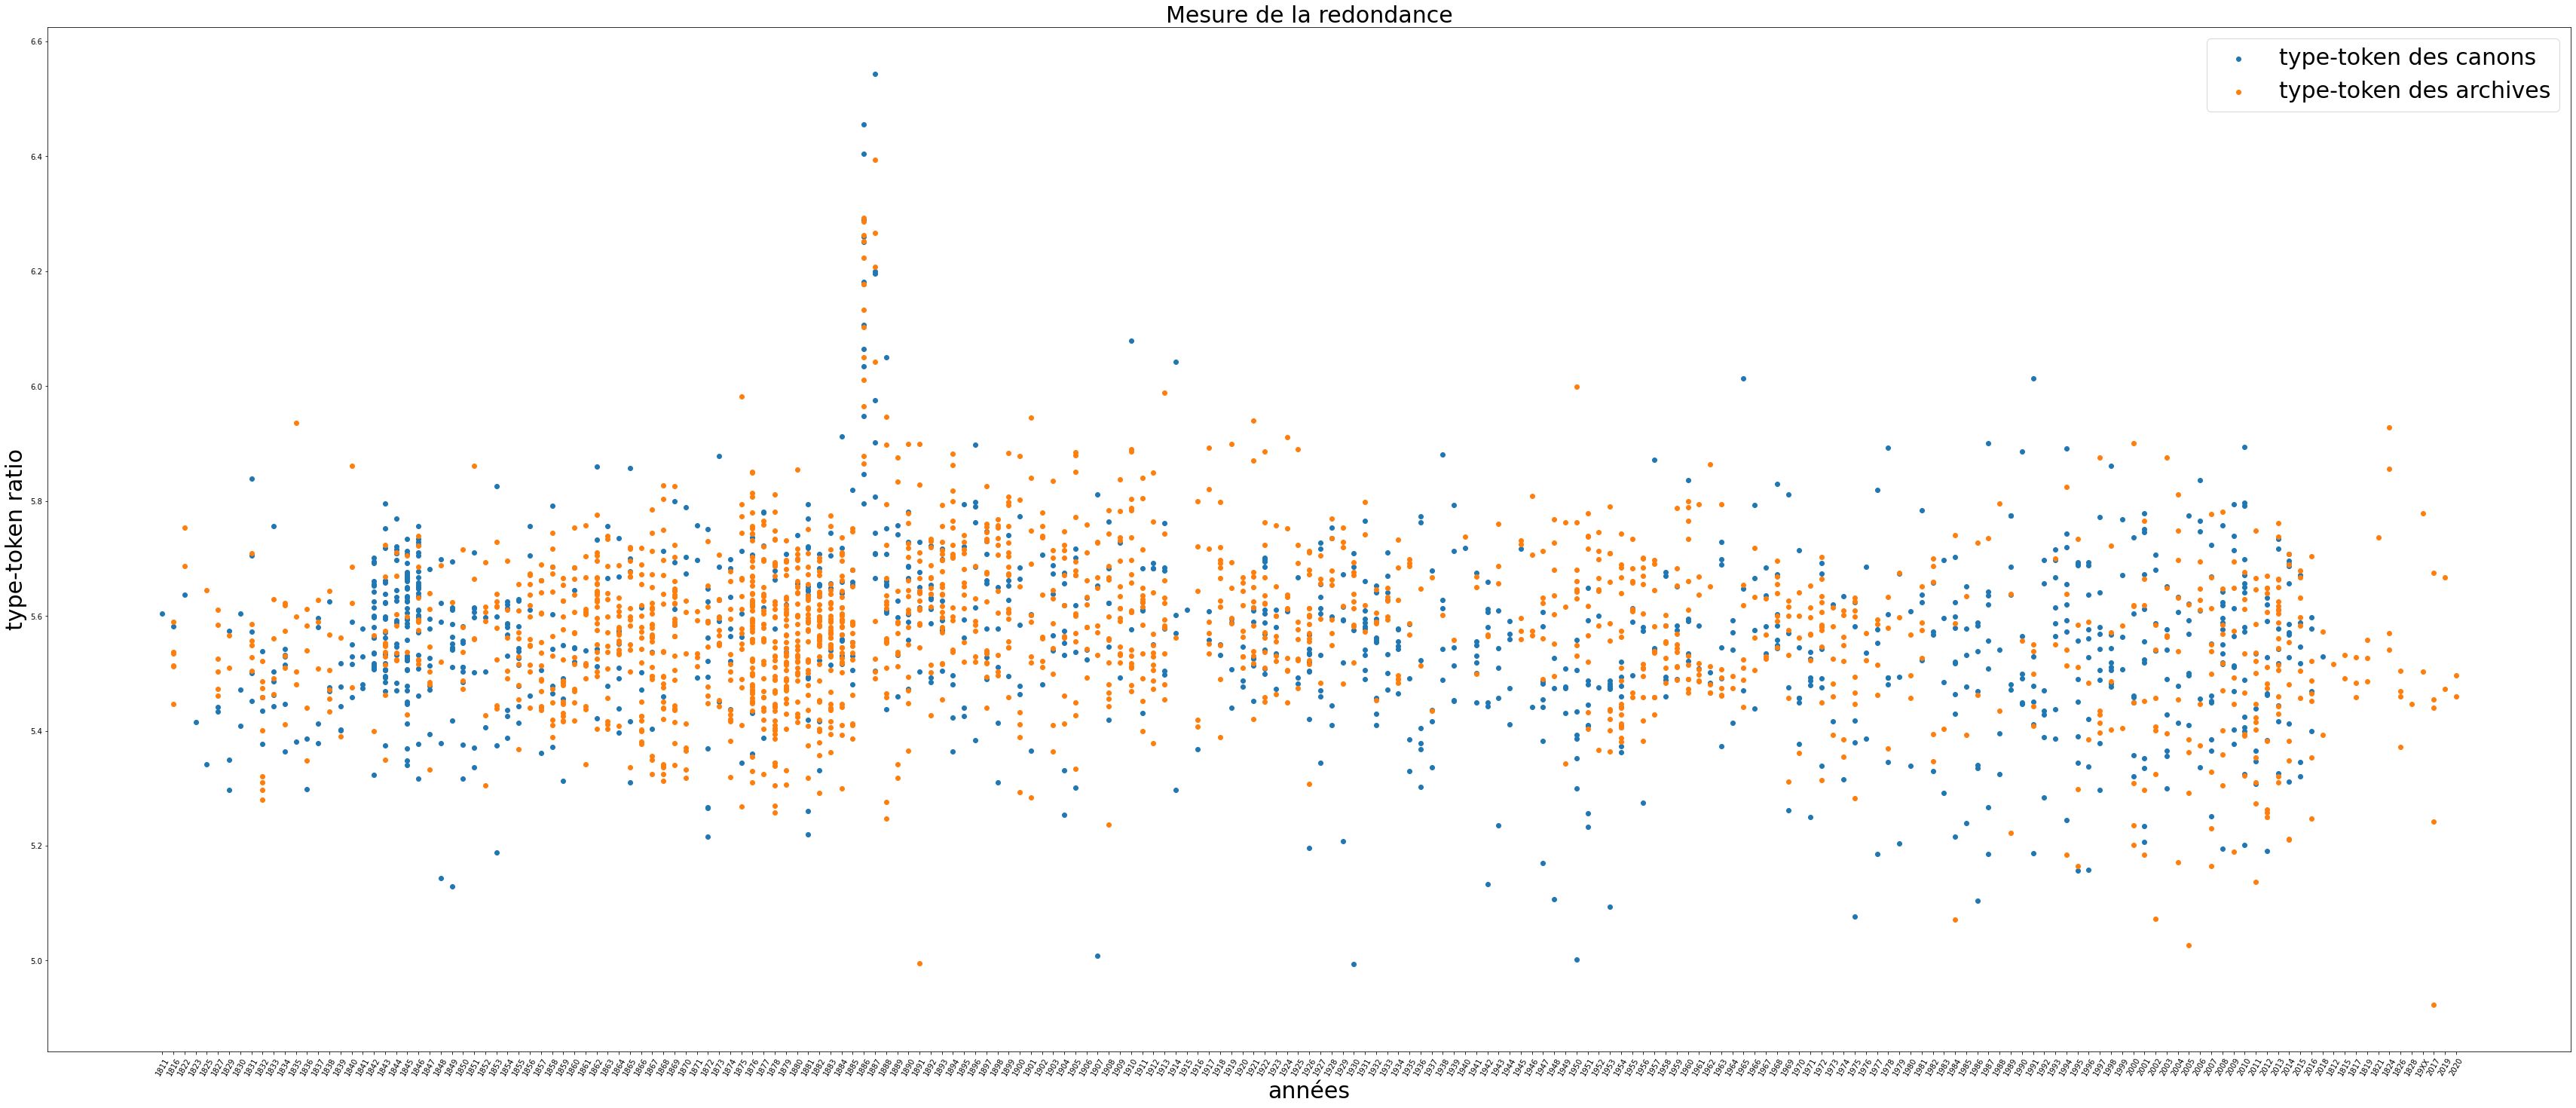

In [32]:
plt.figure(figsize=(60,25))
plt.scatter(annee_canon, type_token_canon, label = 'type-token des canons')
plt.scatter(annee_archive, type_token_archive, label = 'type-token des archives')
plt.ylabel('type-token ratio', fontsize=30)
plt.xlabel('années', fontsize=30)
plt.xticks(rotation=60)

plt.title('Mesure de la redondance', fontsize=30)
plt.legend(prop={'size': 30})
plt.show()

In [49]:
sum(type_token_canon)/len(type_token_canon)

5.562782705314918

In [50]:
sum(type_token_archive)/len(type_token_archive)

5.578571463164676

essai sans le test des stopwords avec un corpus réduit

In [72]:
def word_freq_test_sw(path):
    tag = False
    nombre_token = 0
    words_freq = Counter()
    with open(path, encoding="utf8") as file:
        tree = etree.parse(file)
        tag = est_canon(tree)
        if tree.findall(".//p"):
            for paragraphe in tree.findall(".//p"):
                if paragraphe.text:
                    docs = nlp(paragraphe.text)
                    for token in docs:
                        if token.pos_ != "PUNCT" and "SPACE" and "X" and "SYM":
                            nombre_token += 1
                            words_freq[token.lemma_] += 1
    print("Nombre de tokens dans le texte : ", nombre_token)
    print("Nombre de lemmes dans le texte : ", len(words_freq))
    print("Nombre de lemmes totaux dans le texte : ", sum(words_freq.values()))
    return nombre_token, tag, len(words_freq), sum(words_freq.values())

In [73]:
canon = False
corpus = dict() # dictionnaire des dictionnaires de chaque texte
annee_canon = []
annee_archive = []
type_token_canon = []
type_token_archive = []
for doc in glob('test/*.xml'):
    doc_name = path.splitext(path.basename(doc))[0]
    date = doc_name.split("_")[0]
    print(doc_name)
    token, canon, lemmes, lemmes_totaux = word_freq_test_sw(doc)
    moyenne_lemme = lemmes/token
    if canon:
        type_token_canon.append(moyenne_lemme)
        annee_canon.append(date)
    else:
        type_token_archive.append(moyenne_lemme)
        annee_archive.append(date)

1828_Kock-Paul-de_Jean
Nombre de tokens dans le texte :  106098
Nombre de lemmes dans le texte :  5955
Nombre de lemmes totaux dans le texte :  106098
1829_Hugo-Victor_Le-dernier-jour-d-un-condamne
Nombre de tokens dans le texte :  37574
Nombre de lemmes dans le texte :  4095
Nombre de lemmes totaux dans le texte :  37574
1831_Balzac-Honore-de_La-Peau-de-chagrin-ed-Gosselin
Nombre de tokens dans le texte :  100105
Nombre de lemmes dans le texte :  8288
Nombre de lemmes totaux dans le texte :  100105
1832_Sand-George_Indiana
Nombre de tokens dans le texte :  101386
Nombre de lemmes dans le texte :  5975
Nombre de lemmes totaux dans le texte :  101386
1832_Vigny-Alfred-de_Stello
Nombre de tokens dans le texte :  65186
Nombre de lemmes dans le texte :  6403
Nombre de lemmes totaux dans le texte :  65186
1833_Corbiere-Edouard_La-mer-et-les-marins-Scenes-maritimes
Nombre de tokens dans le texte :  52899
Nombre de lemmes dans le texte :  5096
Nombre de lemmes totaux dans le texte :  52899
18

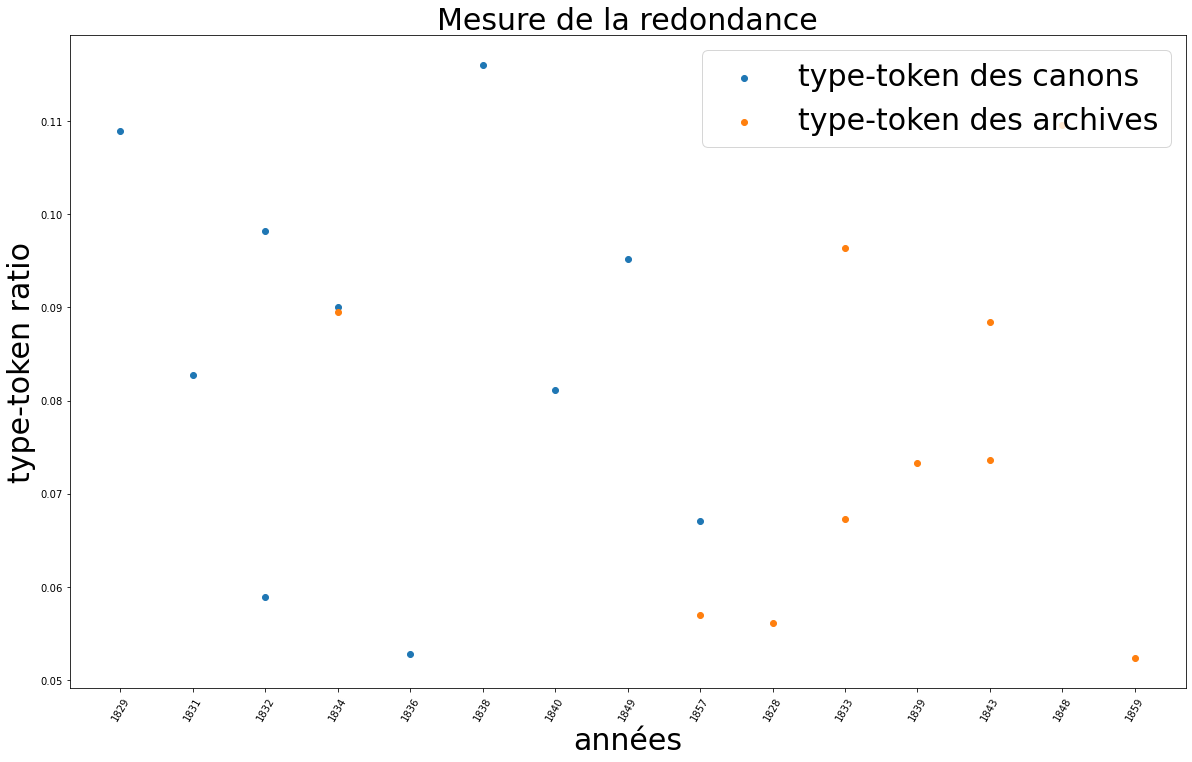

In [75]:
plt.figure(figsize=(20,12))
plt.scatter(annee_canon, type_token_canon, label = 'type-token des canons')
plt.scatter(annee_archive, type_token_archive, label = 'type-token des archives')
plt.ylabel('type-token ratio', fontsize=30)
plt.xlabel('années', fontsize=30)
plt.xticks(rotation=60)

plt.title('Mesure de la redondance', fontsize=30)
plt.legend(prop={'size': 30})
plt.show()

In [76]:
sum(type_token_canon)/len(type_token_canon)

0.08511320486124897

In [77]:
sum(type_token_archive)/len(type_token_archive)

0.07634377307584814